# Translating Hyperbolic Function: Analyzing the Principal Components of the $R_X$ Data Matrix

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import time


### Defining WORKSPACE_PATH

# WORKSPACE_PATH = os.environ['WORKSPACE_PATH']
WORKSPACE_PATH = os.path.join(os.getcwd(), '../../../../../')
ROMNet_fld     = os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/')


### Importing External Libraries

import numpy                             as np
import pandas                            as pd


### Importing Matplotlib and Its Style

import matplotlib.pyplot                 as plt

#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/presentation.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/zoomed.mplstyle'))
plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_1column.mplstyle'))
#plt.style.use(os.path.join(WORKSPACE_PATH, 'ROMNet/romnet/extra/postprocessing/paper_2columns.mplstyle'))


#from scipy.integrate import solve_ivp
#import pyDOE   
from PCAfold         import PCA          as PCAA

3.8.11 (default, Jun 29 2021, 03:17:05) 
[Clang 12.0.0 (clang-1200.0.32.29)]


Missing colon in file PosixPath('/Users/sventur/.matplotlib/stylelib/paper_2columns.mplstyle'), line 1 ('f#### MATPLOTLIBRC FORMAT')


## Defining Input Variables

In [2]:
OutputDir       = os.path.join(WORKSPACE_PATH, 'ROMNet/Data/TransTanh_100Cases/Orig/')
FigDir          = os.path.join(WORKSPACE_PATH, '../Desktop/Paper_Figures_DeepONet_TEMP/')

Vars            = ['x']
NVars           = len(Vars)

n_ics           = 100
valid_perc      = 20
n_ics_test      = 10

PCAType         = 'OneByOne'
mode_name       = '1'
iVar            = 0

n_modesFinal    = 8


ColorVec        = ['#190707', '#dd3232', '#0065a9', '#348a00','#985396','#f68b69']

try:
    os.makedirs(OutputDir+'/'+str(PCAType))
except:
    pass

## Loading Training Data

In [3]:
Cols   = []
NewFlg = True
for iC in range(n_ics):

    FileName             = OutputDir+'/train/ext/y.csv.'+str(iC+1)
    Data                 = pd.read_csv(FileName, header=0)
    DataTemp             = Data[Vars[iVar]]

    if (np.abs( (DataTemp[0] - DataTemp[len(Data)-1])/DataTemp[0] ) > 1.e-3):
        DataICTemp  = Data[Vars].iloc[0]

        if (NewFlg):
            DataInput        = DataTemp
            DataIC           = DataICTemp
            NewFlg           = False
        else:
            DataInput        = pd.concat([DataInput, DataTemp], axis=1)
            DataIC           = pd.concat([DataIC, DataICTemp], axis=1)
        Cols.append(str(iC+1))

tVec              = Data['t']
DataInput.columns = Cols

yMat              = DataInput.to_numpy()

DataIC            = DataIC.T.reset_index(drop=True, inplace=False)

In [4]:
ICs = DataIC.to_numpy()

## Loading Test Data

In [5]:
Cols   = []
NewFlg = True
for iC in range(n_ics_test):

    FileName             = OutputDir+'/test/ext/y.csv.'+str(iC+1)
    Data                 = pd.read_csv(FileName, header=0)
    DataTemp             = Data[Vars[iVar]]

    DataICTemp  = Data[Vars].iloc[0]

    if (NewFlg):
        DataInput_test        = DataTemp
        DataIC_test           = DataICTemp
        NewFlg                = False
    else:
        DataInput_test        = pd.concat([DataInput_test, DataTemp], axis=1)
        DataIC_test           = pd.concat([DataIC_test, DataICTemp], axis=1)
    Cols.append(str(iC+1))

tVec_test              = Data['t']
DataInput_test.columns = Cols

yMat_test              = DataInput_test.to_numpy()

DataIC_test            = DataIC_test.T.reset_index(drop=True, inplace=False)

In [6]:
ICs_test = DataIC_test.to_numpy()

In [7]:
## Estimating the Required Number of Singular Values

/usr/local/lib/python3.8/site-packages/PCAfold/reduction.py:193: RuntimeWarning: invalid value encountered in sqrt
  loadings_matrix[j, i] = (self.A[j, i] * np.sqrt(self.L[i])) / np.sqrt(self.S[j, j])
/usr/local/lib/python3.8/site-packages/PCAfold/reduction.py:193: RuntimeWarning: invalid value encountered in sqrt
  loadings_matrix[j, i] = (self.A[j, i] * np.sqrt(self.L[i])) / np.sqrt(self.S[j, j])
/usr/local/lib/python3.8/site-packages/PCAfold/reduction.py:193: RuntimeWarning: invalid value encountered in sqrt
  loadings_matrix[j, i] = (self.A[j, i] * np.sqrt(self.L[i])) / np.sqrt(self.S[j, j])
/usr/local/lib/python3.8/site-packages/PCAfold/reduction.py:193: RuntimeWarning: invalid value encountered in sqrt
  loadings_matrix[j, i] = (self.A[j, i] * np.sqrt(self.L[i])) / np.sqrt(self.S[j, j])
/usr/local/lib/python3.8/site-packages/PCAfold/reduction.py:193: RuntimeWarning: invalid value encountered in sqrt
  loadings_matrix[j, i] = (self.A[j, i] * np.sqrt(self.L[i])) / np.sqrt(self.S[j,

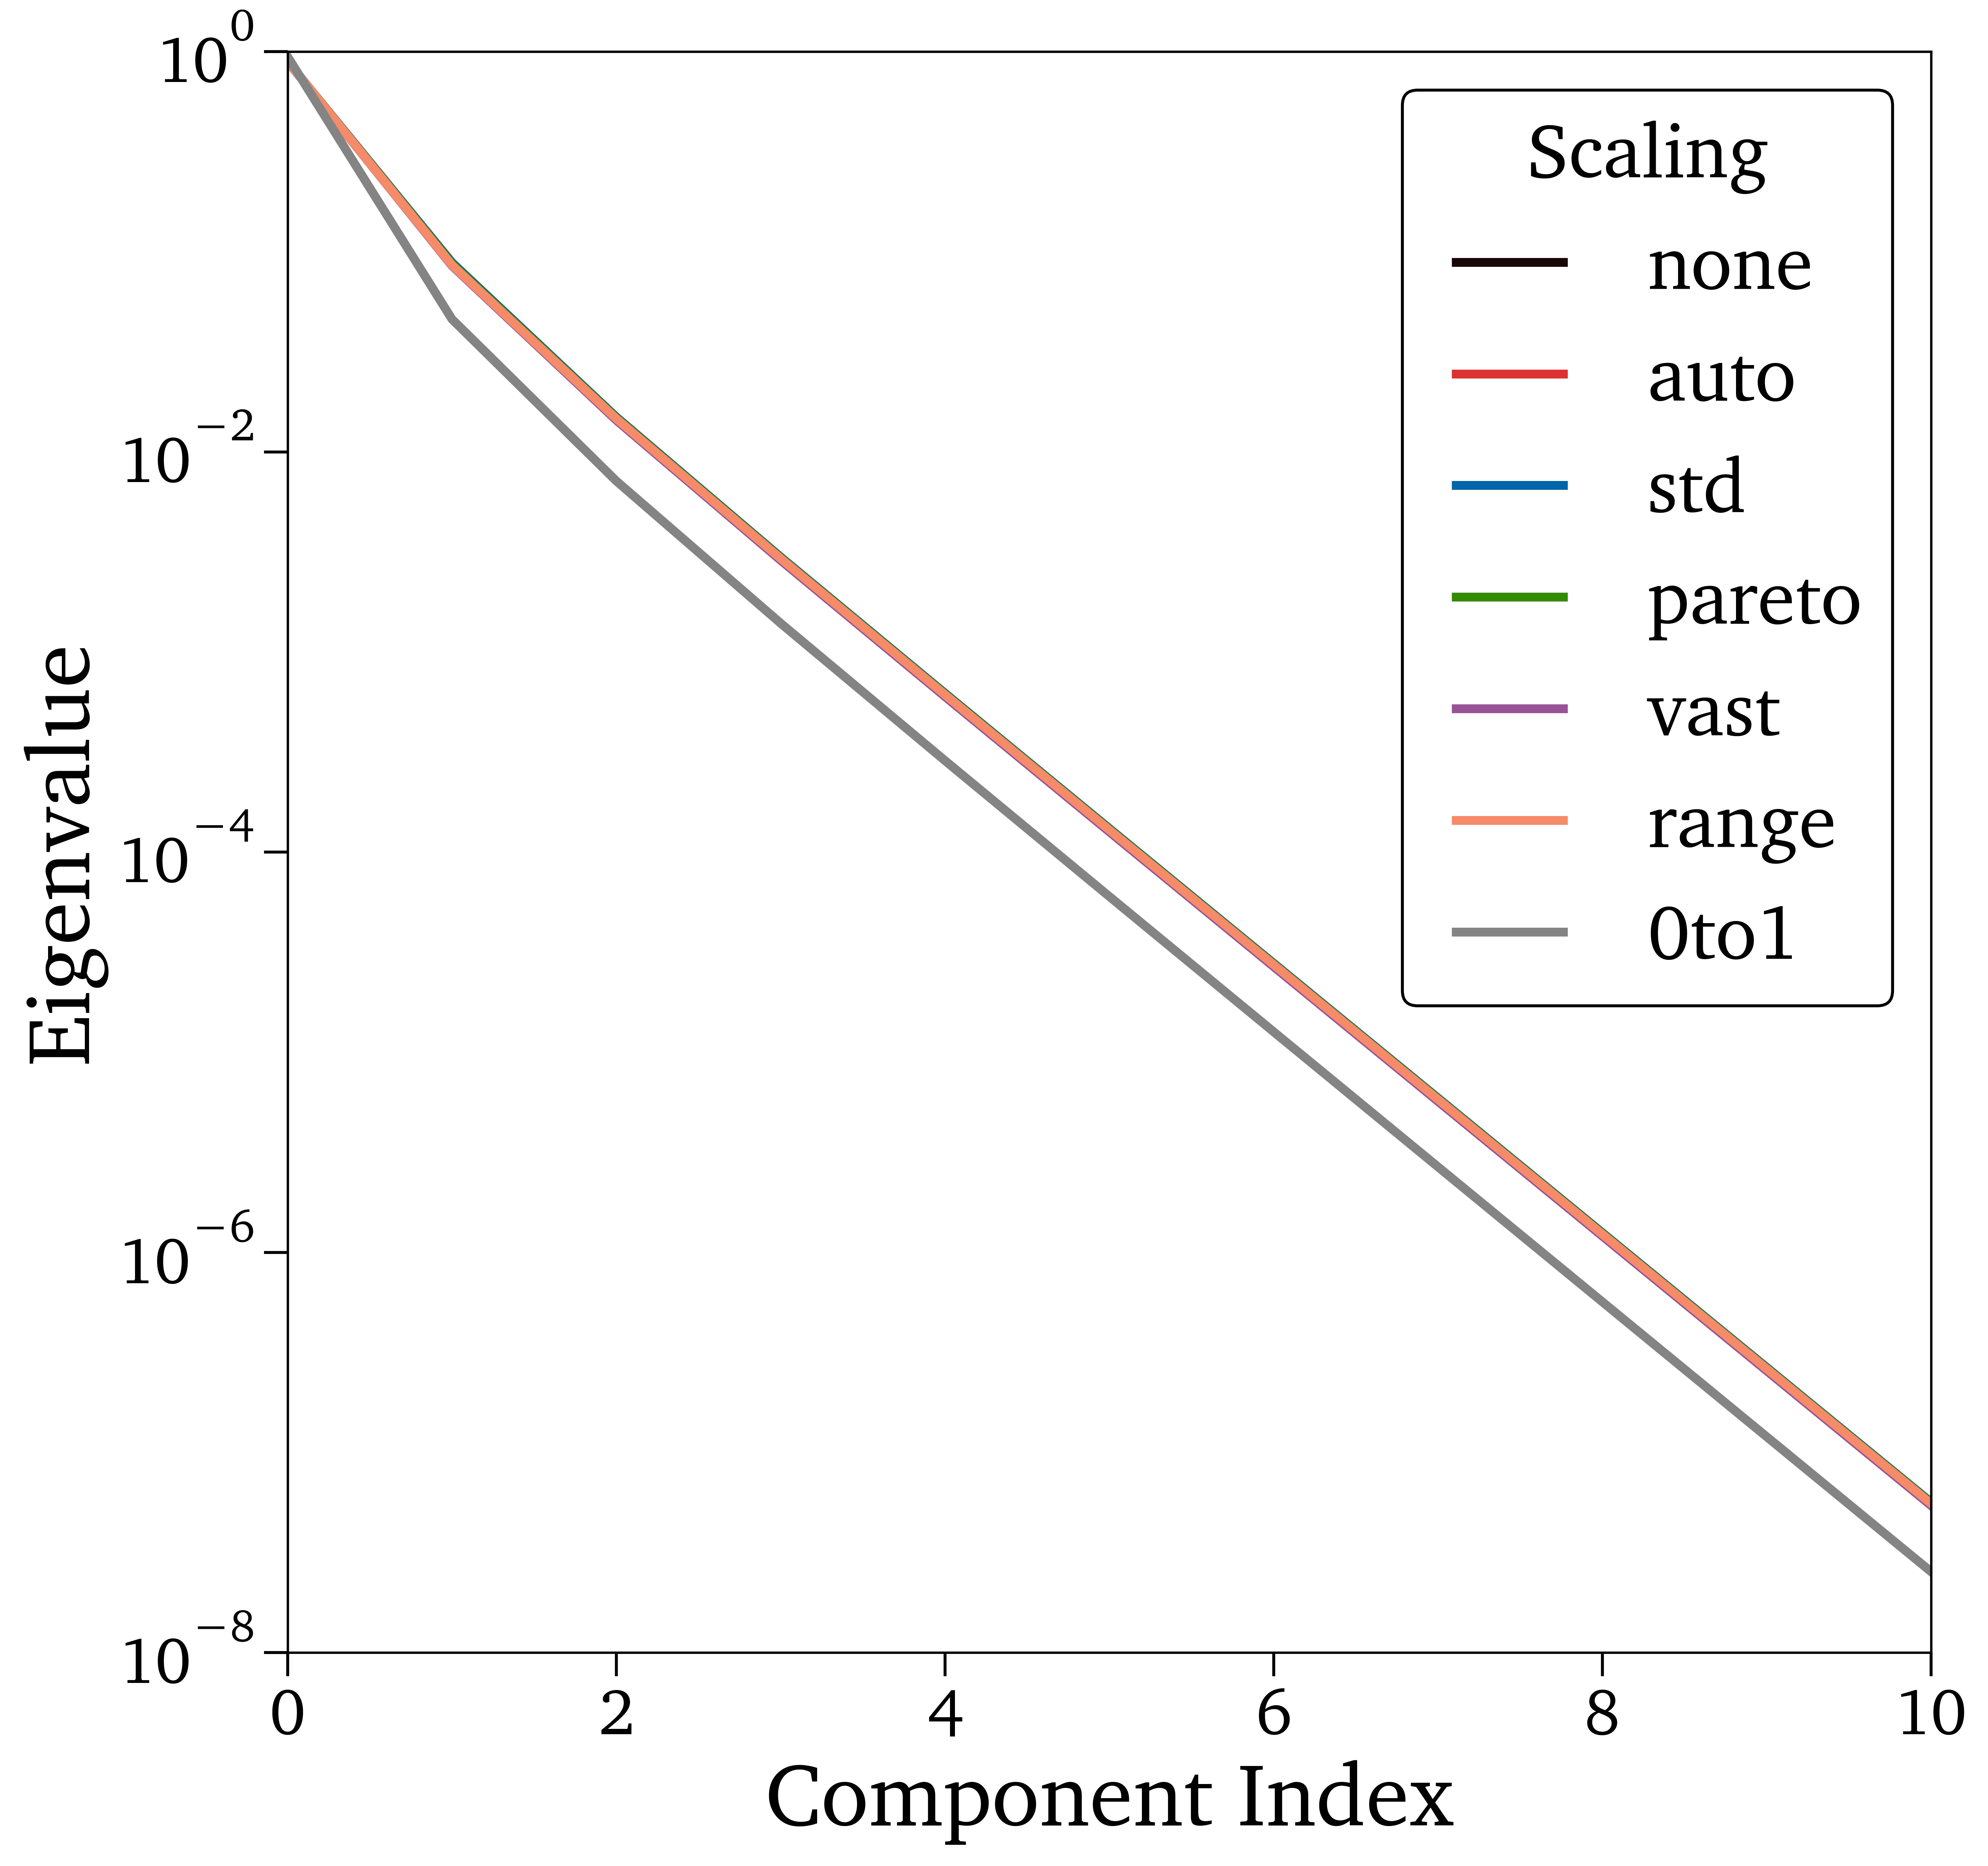

In [8]:
n_modes      = 64
ScalingVec = ['none', 'auto', 'std', 'pareto', 'vast', 'range', '0to1']
#'none', '', 'auto', 'std', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max', 'poisson', 'vast_2', 'vast_3', 'vast_4'

plt.figure()
for j, Scaling in enumerate(ScalingVec):

    pca        = PCAA(yMat, scaling=Scaling, n_components=int(n_modes))
    C          = pca.X_center
    D          = pca.X_scale
    A          = pca.A[:,0:n_modes].T
    L          = pca.L
    AT         = A.T

    plt.plot(L, label=Scaling)
    
plt.ylim([1.e-14, 1.e0])
plt.xlabel('Component Index')
plt.ylabel('Eigenvalue')
plt.yscale('log')
plt.legend(title='Scaling')
plt.xlim([0,10])
plt.ylim([1.e-8,1.])

if (FigDir):
    #plt.savefig(FigDir+'/TransTanh_Eigenvalues.eps', format='eps', bbox_inches='tight')
    pass

(1e-08, 0.1)

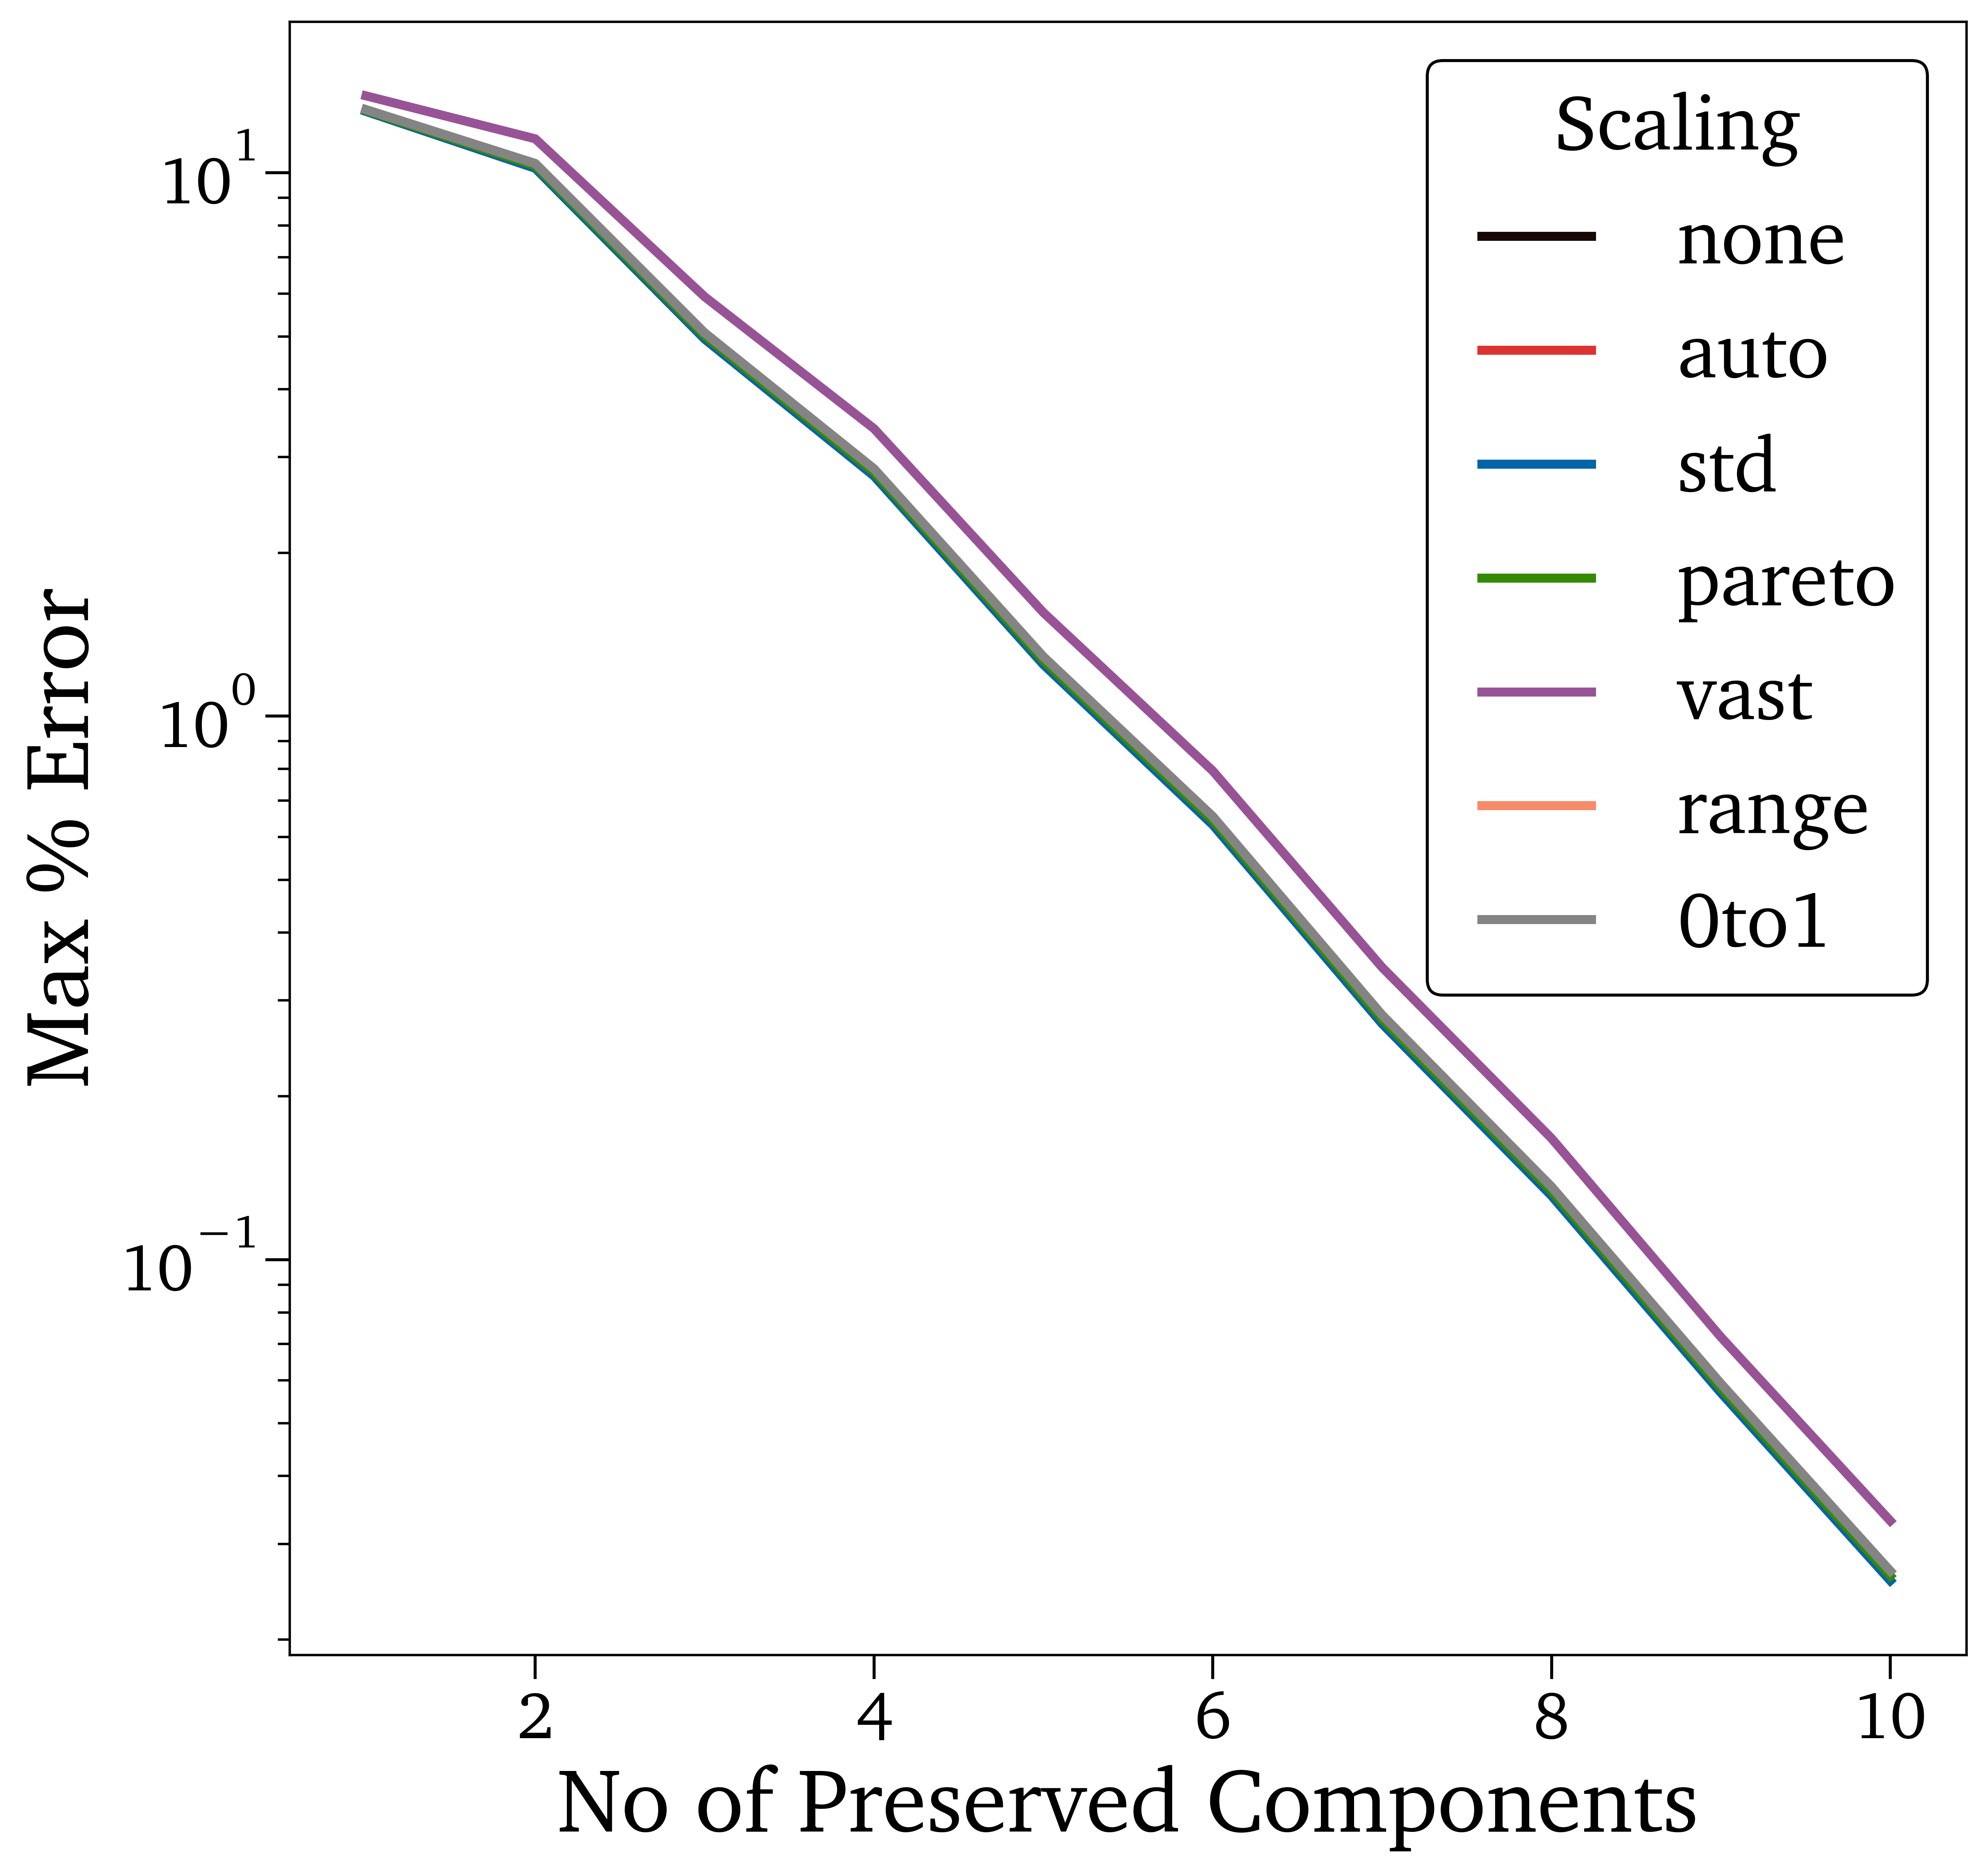

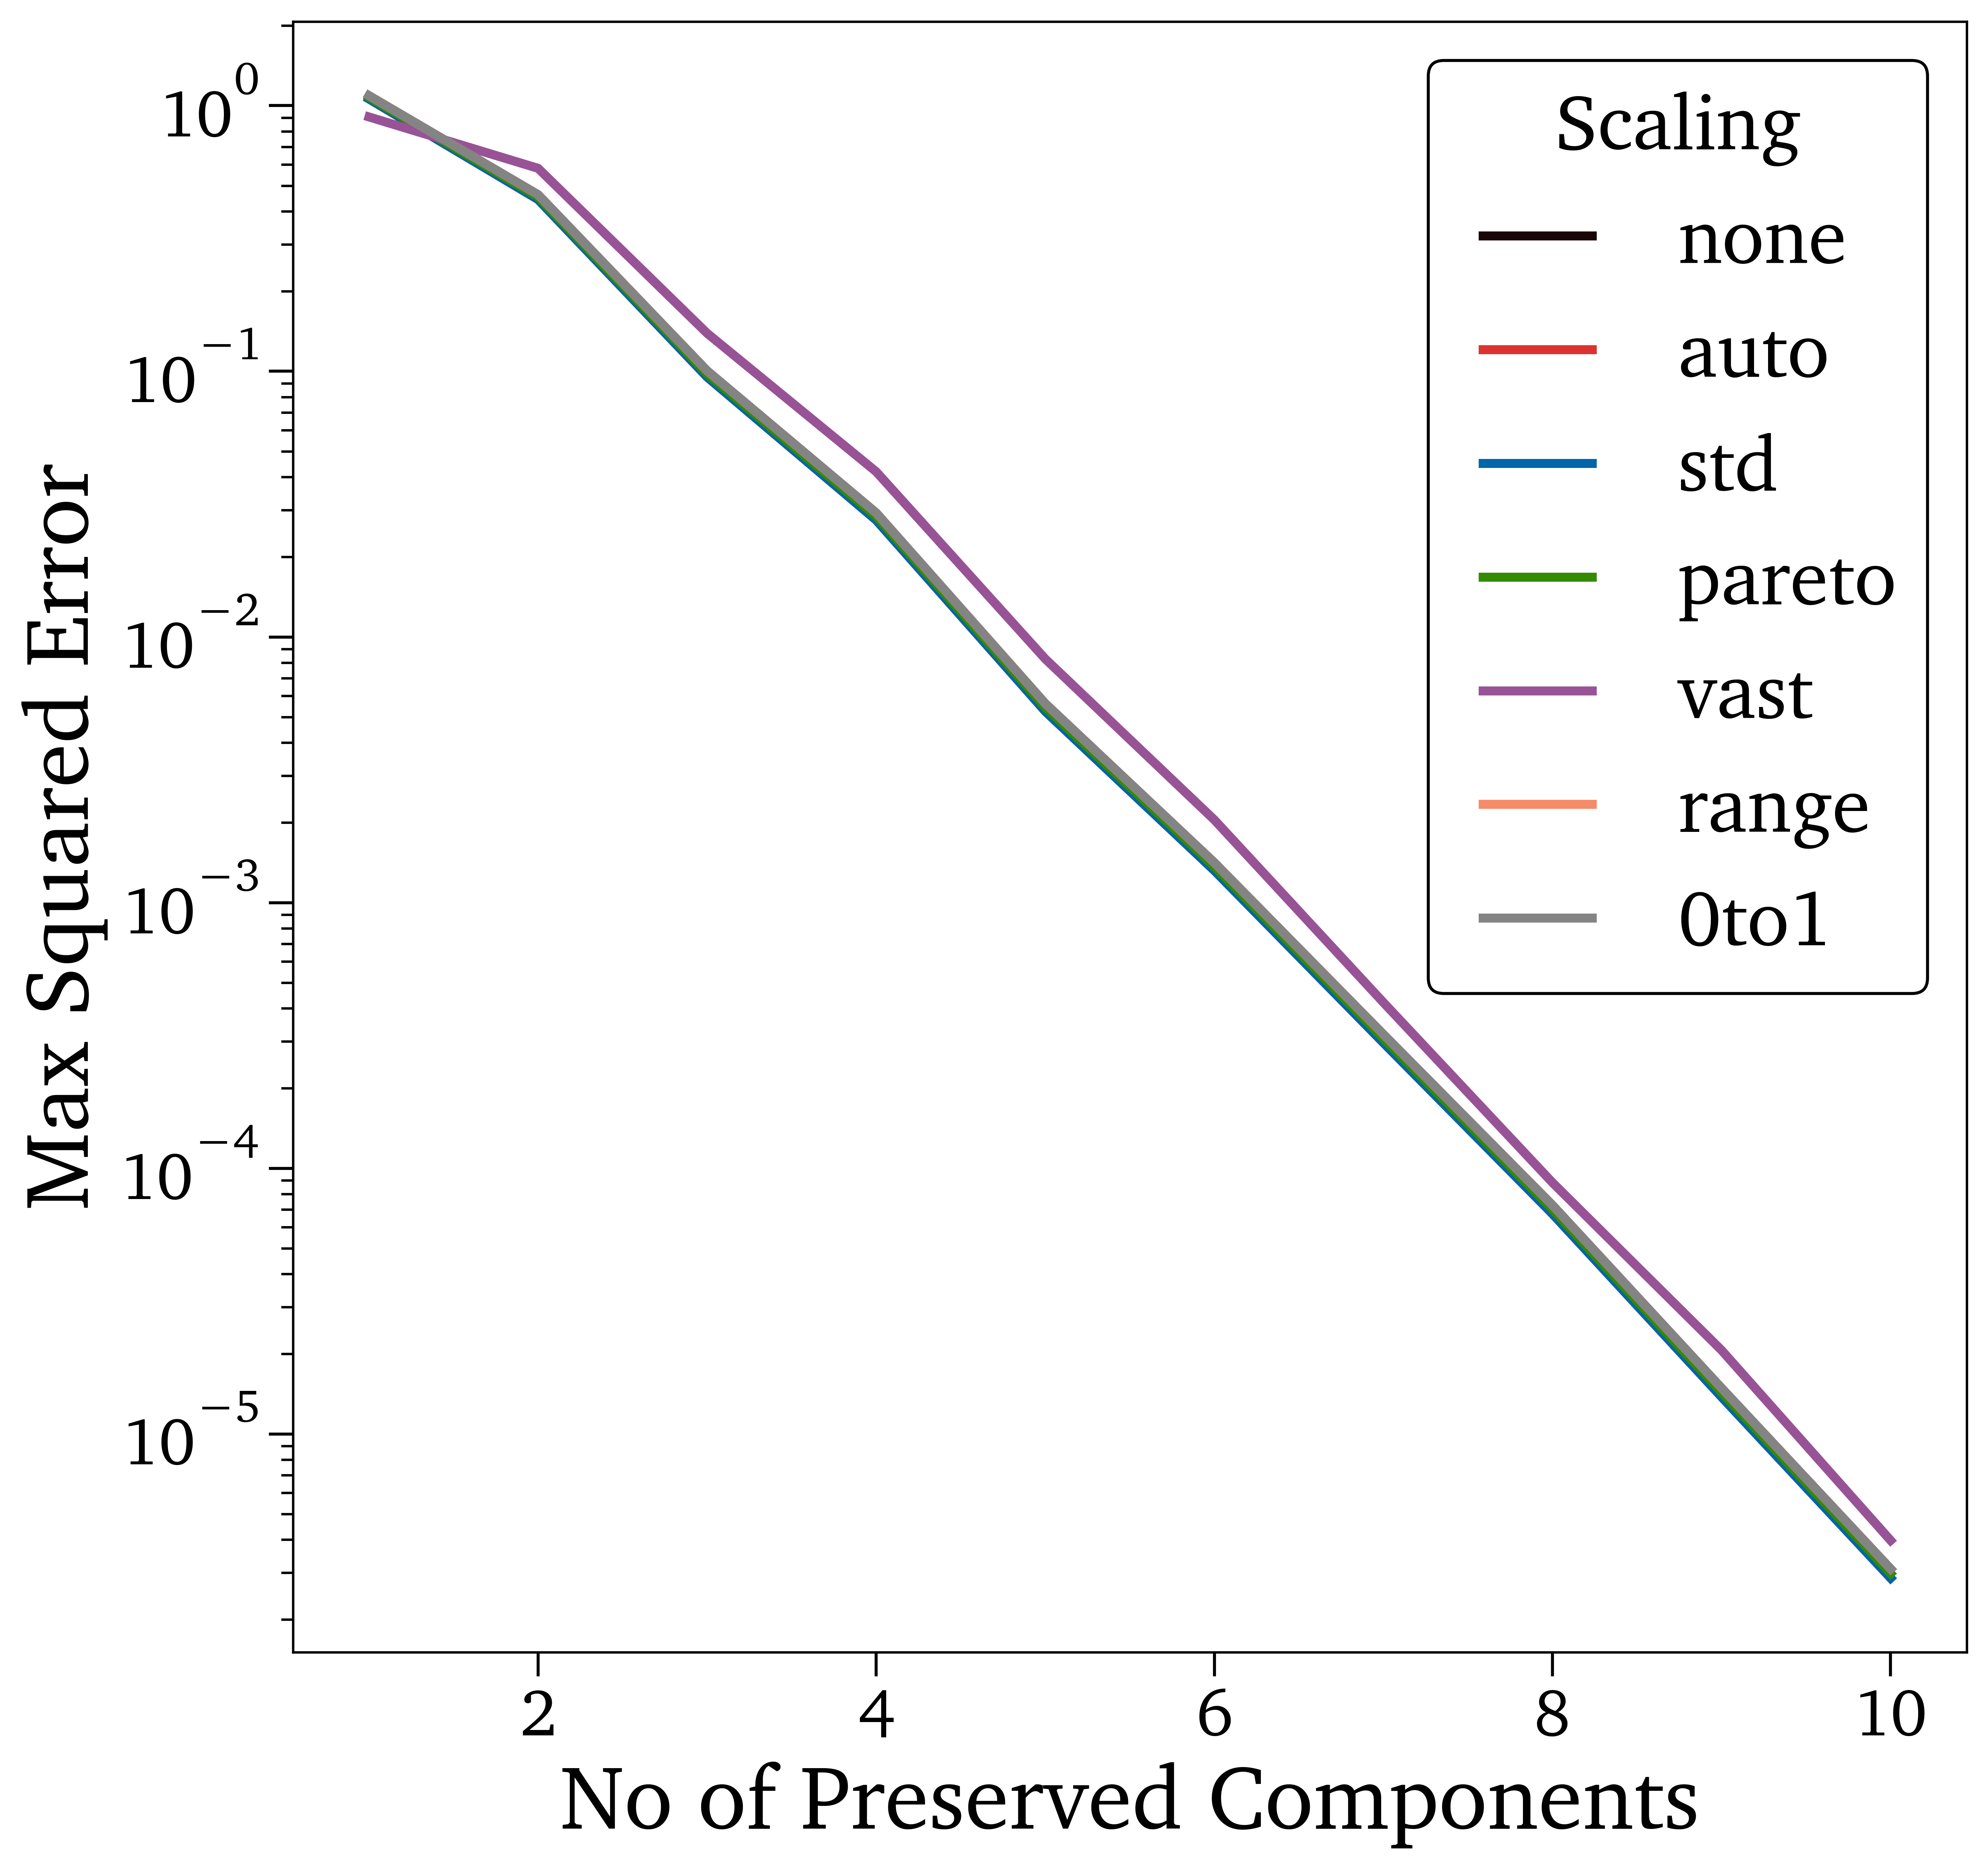

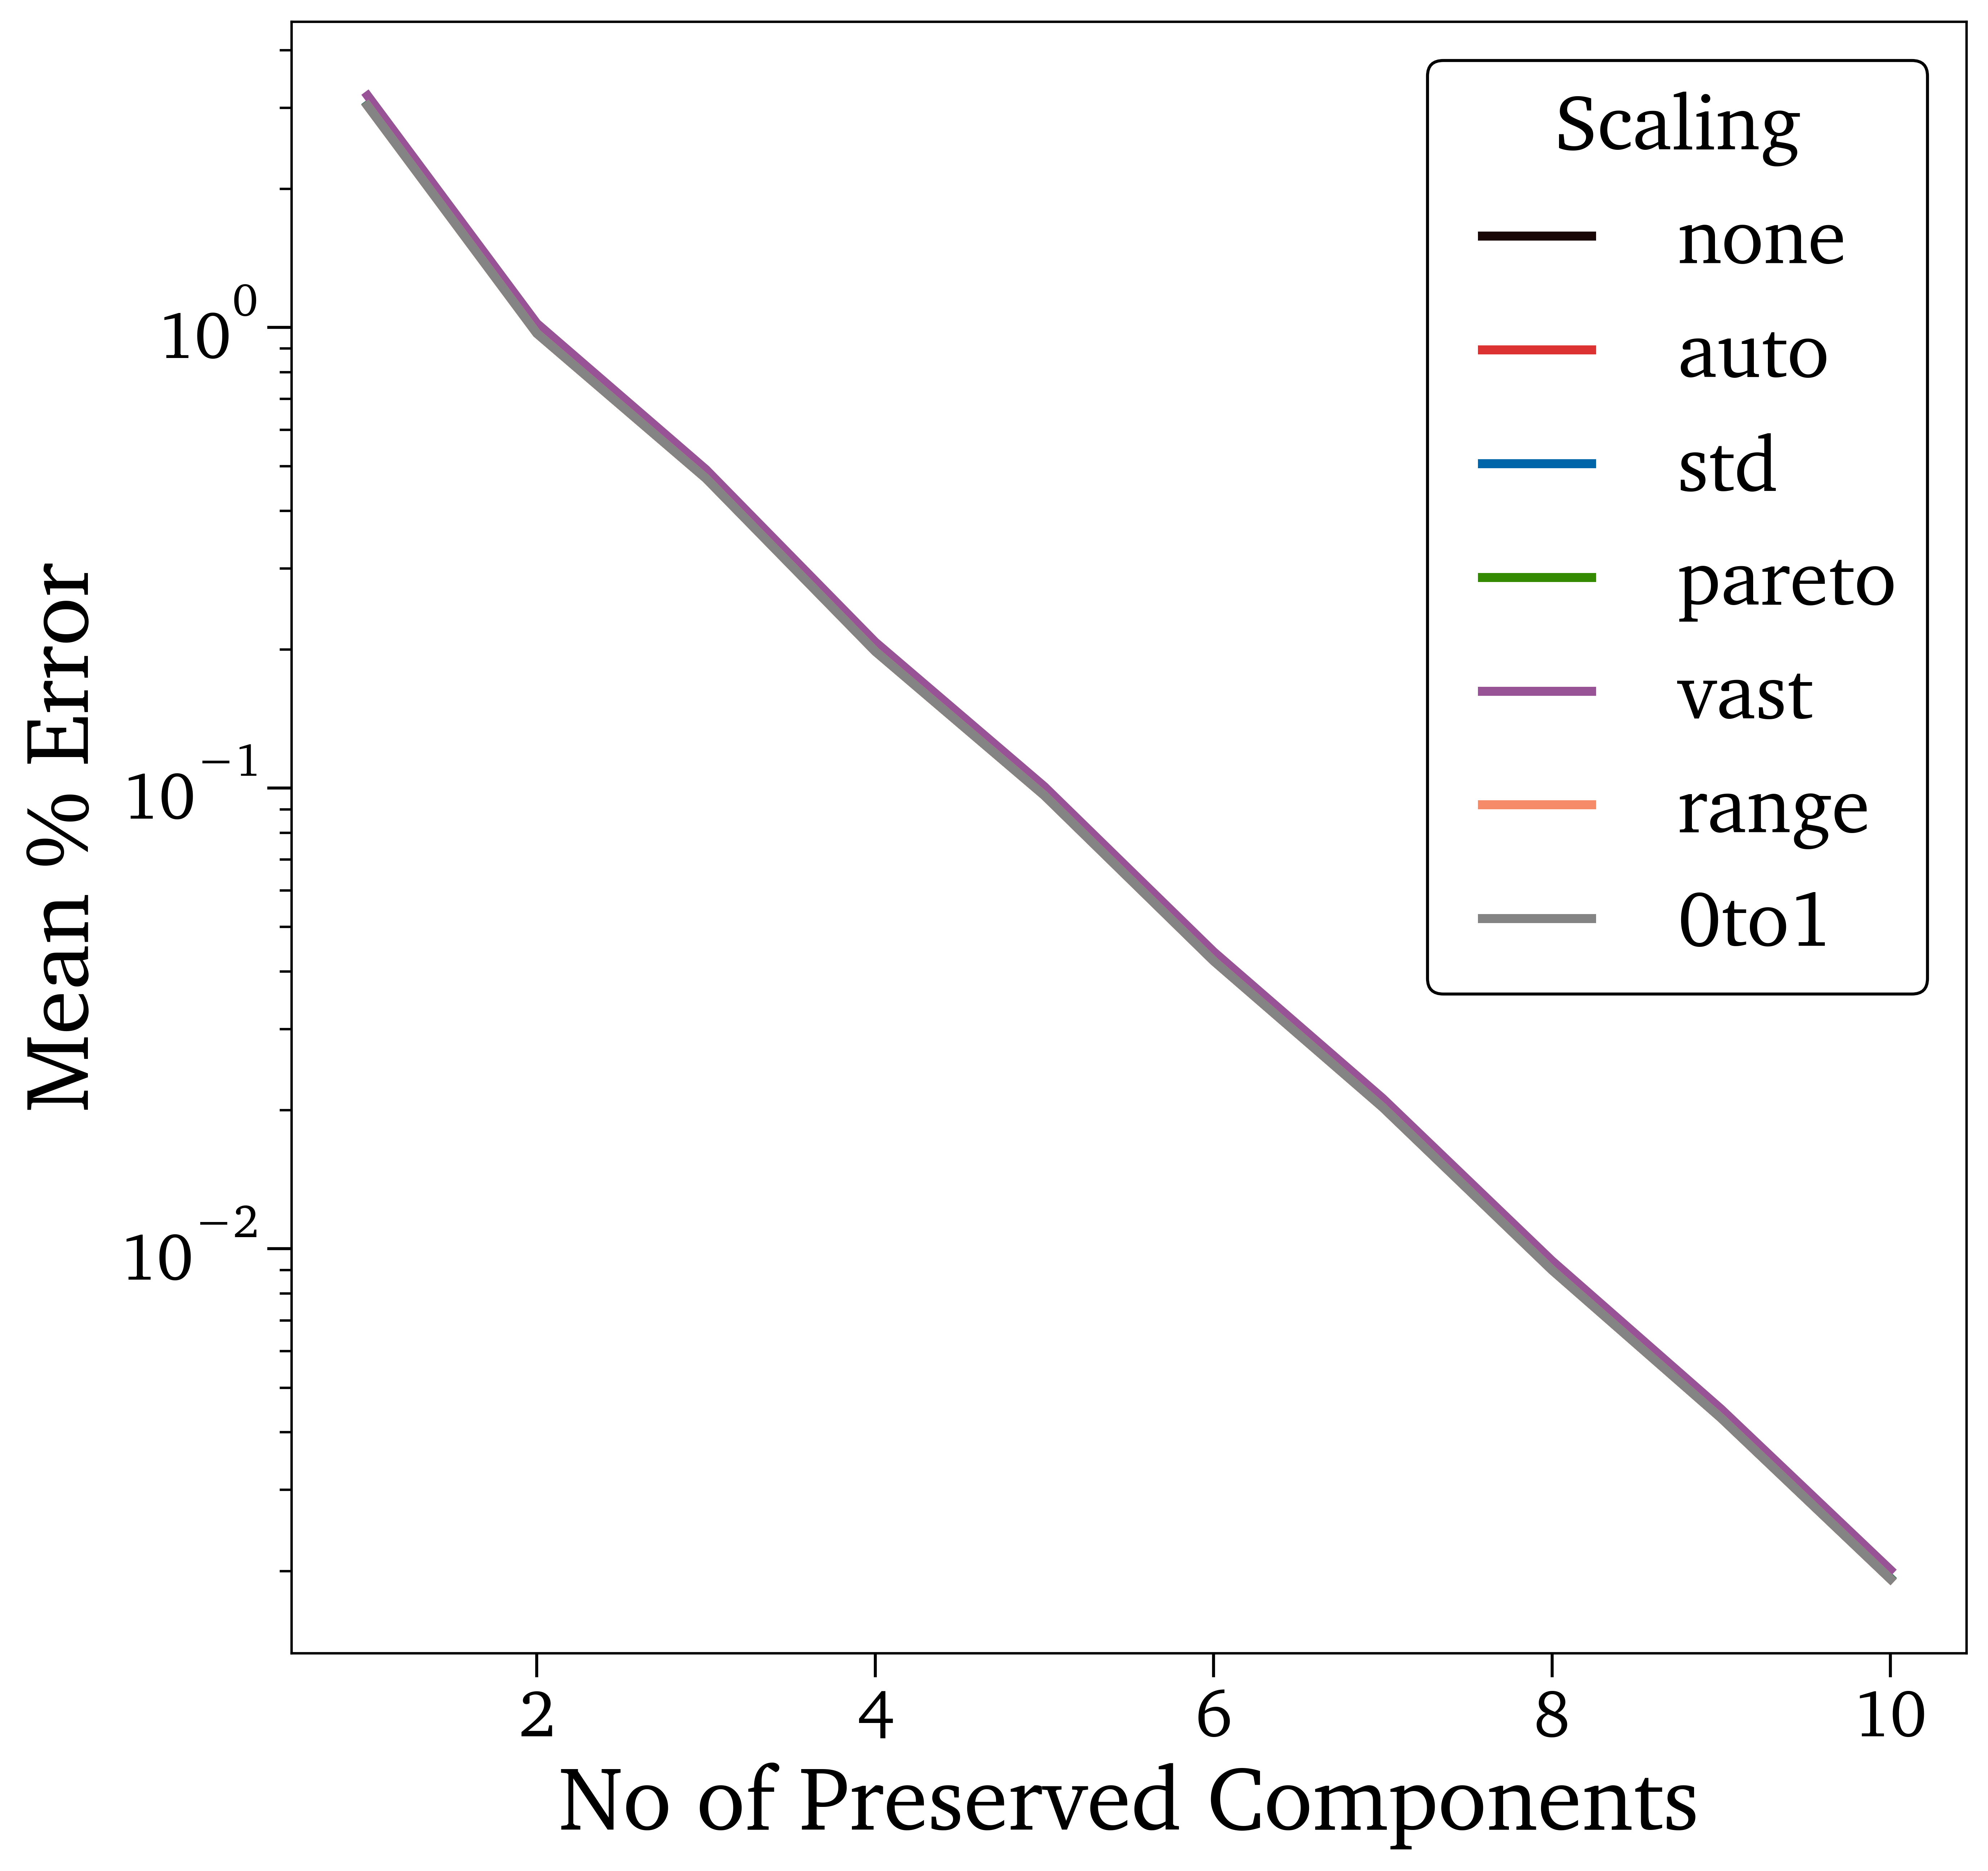

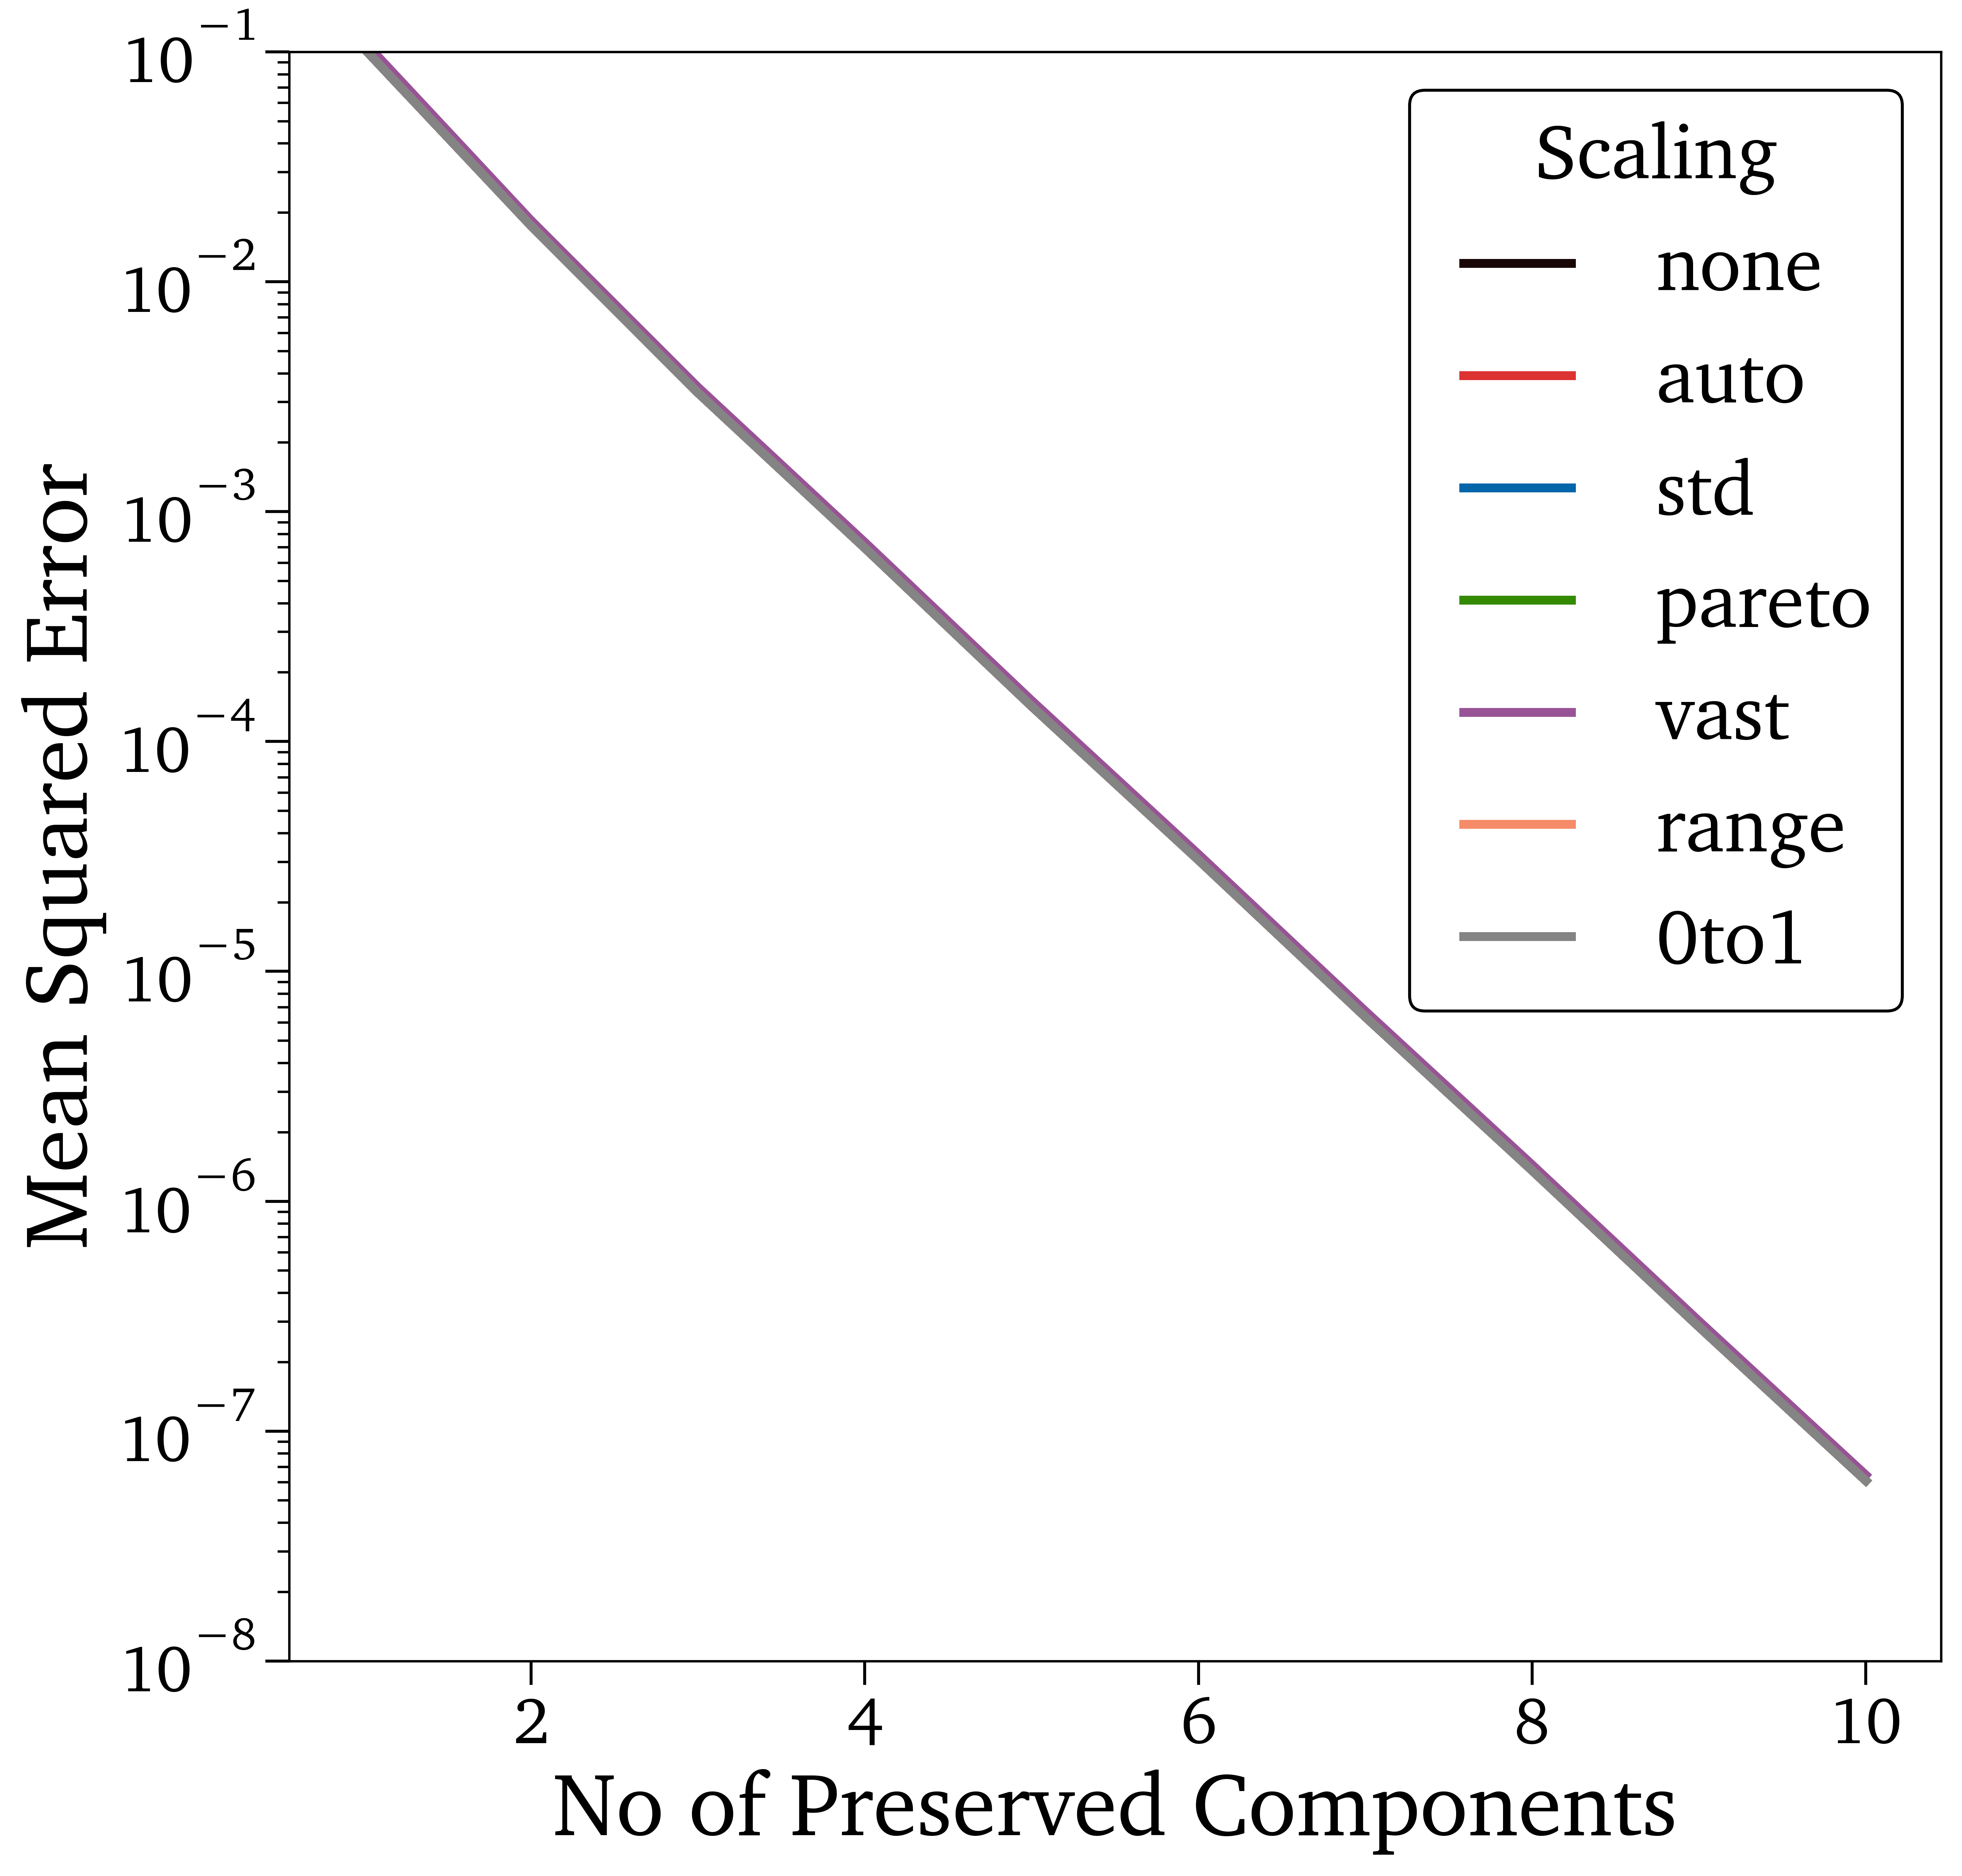

In [9]:
n_modesVec   = np.arange(1,11,1)
ScalingVec = ['none', 'auto', 'std', 'pareto', 'vast', 'range', '0to1']
#'none', '', 'auto', 'std', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max', 'poisson', 'vast_2', 'vast_3', 'vast_4'

MaxPerc    = np.zeros((len(n_modesVec), len(ScalingVec)))
MaxSE      = np.zeros((len(n_modesVec), len(ScalingVec)))
MeanPerc   = np.zeros((len(n_modesVec), len(ScalingVec)))
MSE        = np.zeros((len(n_modesVec), len(ScalingVec)))
for i, n_modes in enumerate(n_modesVec):
    #print('n_modes = ', n_modes)
    
    for j, Scaling in enumerate(ScalingVec):

        pca        = PCAA(yMat, scaling=Scaling, n_components=int(n_modes), nocenter=True)
        C          = pca.X_center
        D          = pca.X_scale
        A          = pca.A[:,0:n_modes].T
        L          = pca.L
        AT         = A.T

        yMat_pca   = ((yMat - C)/D).dot(AT)
        yMat_      = (yMat_pca.dot(A))*D + C
        
        MaxPerc[i,j]    = np.max(abs((yMat - yMat_)/yMat)*100)
        MaxSE[i,j]      = np.max((yMat - yMat_)**2)
        MeanPerc[i,j]   = np.mean(abs((yMat - yMat_)/yMat)*100)
        MSE[i,j]        = np.mean((yMat - yMat_)**2)

plt.figure()
plt.plot(n_modesVec, MaxPerc, label=ScalingVec)
plt.xlabel('No of Preserved Components')
plt.ylabel('Max % Error')
plt.legend(title='Scaling')
plt.yscale('log')

plt.figure()
plt.plot(n_modesVec, MaxSE, label=ScalingVec)
plt.xlabel('No of Preserved Components')
plt.ylabel('Max Squared Error')
plt.legend(title='Scaling')
plt.yscale('log')

plt.figure()
plt.plot(n_modesVec, MeanPerc, label=ScalingVec)
plt.xlabel('No of Preserved Components')
plt.ylabel('Mean % Error')
plt.legend(title='Scaling')
plt.yscale('log')

plt.figure()
plt.plot(n_modesVec, MSE, label=ScalingVec)
plt.xlabel('No of Preserved Components')
plt.ylabel('Mean Squared Error')
plt.legend(title='Scaling')
plt.yscale('log')
plt.ylim([1e-8, 1e-1])

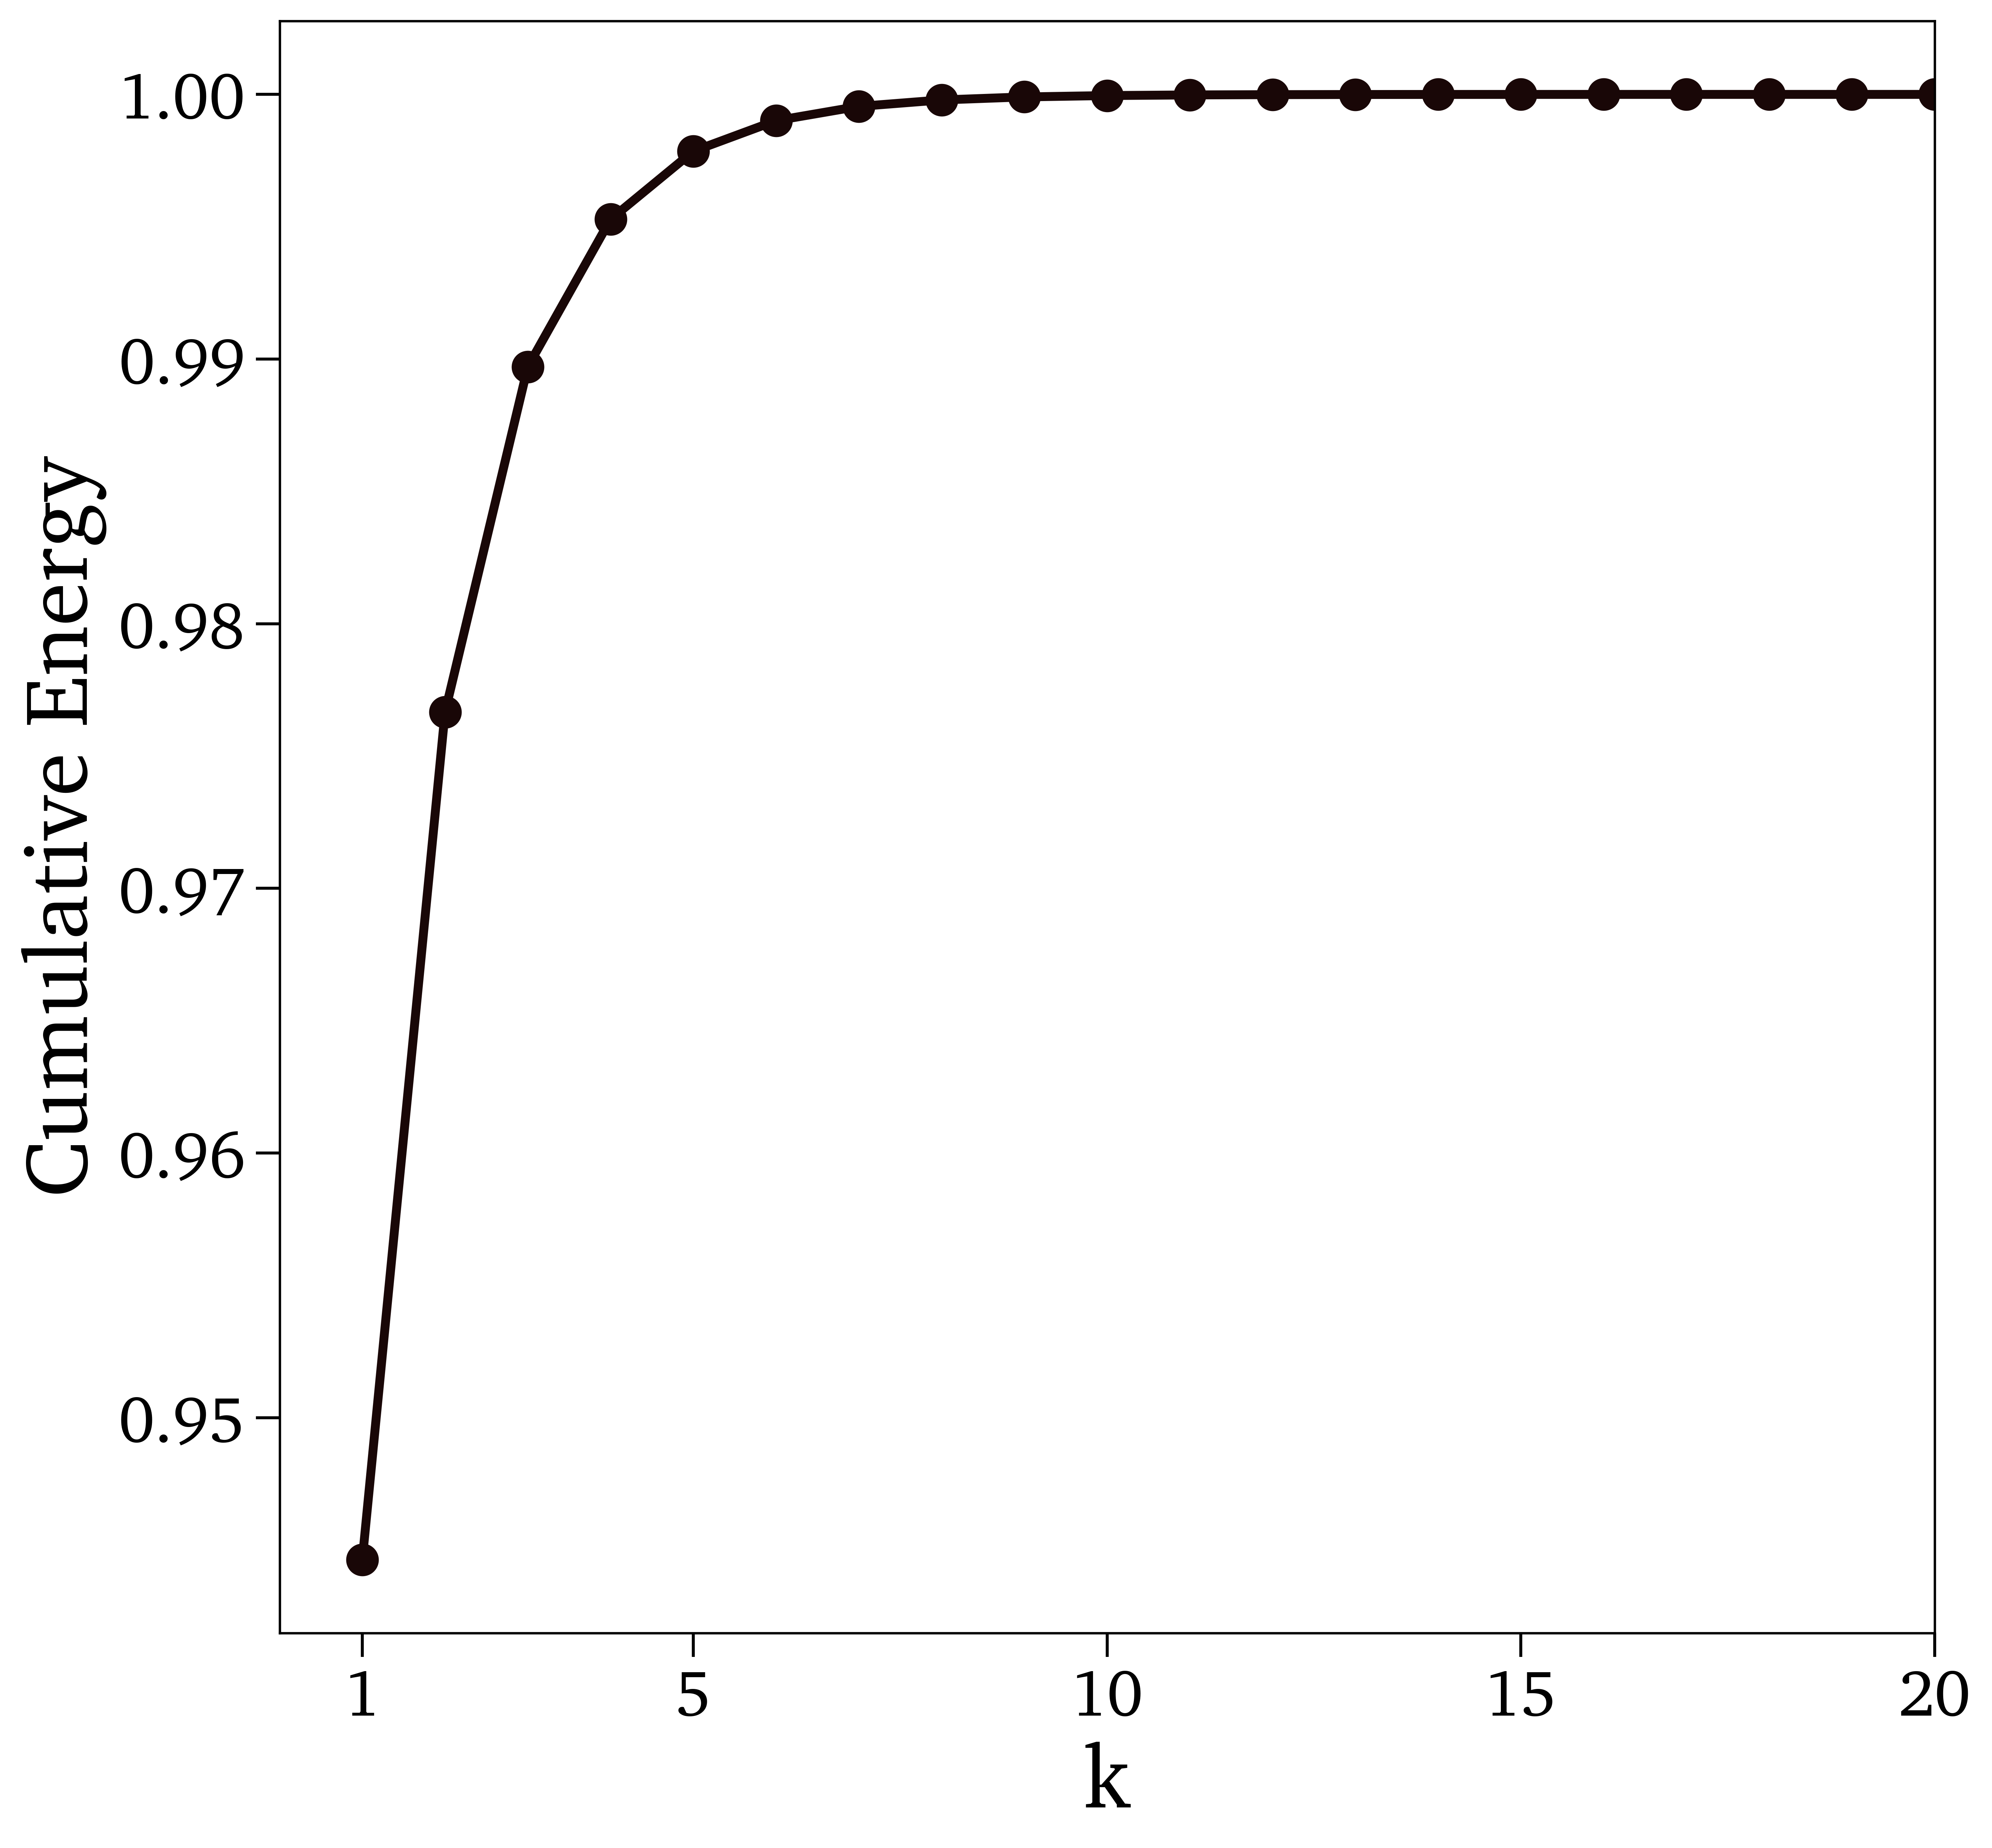

In [10]:
n_modes    = 10
ScalingVec = ['none']#, 'auto', 'std', 'pareto', 'vast', 'range', '0to1']
             # options: 'none', '', 'auto', 'std', 'pareto', 'vast', 'range', '0to1', '-1to1', 'level', 'max', 'poisson', 'vast_2', 'vast_3', 'vast_4'

fig = plt.figure()
for j, Scaling in enumerate(ScalingVec):

    pca        = PCAA(yMat, scaling=Scaling, n_components=int(n_modes), nocenter=True)
    C          = pca.X_center
    D          = pca.X_scale
    A          = pca.A[:,0:n_modes].T
    L          = pca.L
    LL         = np.maximum(L,0.)
    AT         = A.T

    plt.plot(np.arange(len(LL))+1, np.cumsum(np.sqrt(LL))/np.sum(np.sqrt(LL)),'-o')
    

plt.xlim([0, 20])
#plt.ylim([0.0, 1.0e0])
plt.xlabel(r'$k$')
plt.ylabel('Cumulative Energy')
plt.xticks([1,5,10,15,20])
#plt.yscale('log')

if (FigDir):
    plt.savefig(FigDir+'/TransTanh_CumEnergy.eps', format='eps', bbox_inches='tight')

## Preserving the first $n_{modesFinal}$ Singular Values and Saving the Related Matrixes/Vectors

In [11]:
pca        = PCAA(yMat, scaling='none', n_components=2, nocenter=True)
C          = pca.X_center
D          = pca.X_scale
A          = pca.A[:,0:2].T
L          = pca.L
AT         = A.T
yMat_Scaled= ((yMat - C)/D)
print('[PCA] Shape of A        = ', A.shape)
print('[PCA] ')

[PCA] Shape of A        =  (2, 100)
[PCA] 


In [12]:
#yMat_pca    = pca.transform(yMat, nocenter=False)
yMat_pca_2 = ((yMat - C)/D).dot(AT)
yMat_2_    = (yMat_pca_2.dot(A))*D + C

# yMat_pca_2_test = ((yMat_test - C)/D).dot(AT)
# yMat_2_test_    = (yMat_pca_2_test.dot(A))*D + C

print('[PCA] Shape of yMat_pca = ', yMat_pca.shape)
print('[PCA]  Max % Error = ', np.max(abs((yMat - yMat_2_)/yMat)*100))
print('[PCA]  Max      SE = ', np.max((yMat - yMat_2_)**2))
print('[PCA] Mean % Error = ', np.mean(abs((yMat - yMat_2_)/yMat)*100))
print('[PCA]          MSE = ', np.mean((yMat - yMat_2_)**2))

[PCA] Shape of yMat_pca =  (500, 10)
[PCA]  Max % Error =  10.398151527156104
[PCA]  Max      SE =  0.4621635721304061
[PCA] Mean % Error =  0.970553431837242
[PCA]          MSE =  0.017503008617427637


In [13]:
pca        = PCAA(yMat, scaling='none', n_components=n_modesFinal, nocenter=True)
C          = pca.X_center
D          = pca.X_scale
A          = pca.A[:,0:n_modesFinal].T
L          = pca.L
AT         = A.T
yMat_Scaled= ((yMat - C)/D)
print('[PCA] Shape of A        = ', A.shape)
print('[PCA] ')

[PCA] Shape of A        =  (8, 100)
[PCA] 


### Reduction Error Estimate

In [14]:
#yMat_pca    = pca.transform(yMat, nocenter=False)
yMat_pca   = ((yMat - C)/D).dot(AT)
yMat_      = (yMat_pca.dot(A))*D + C

# yMat_pca_test   = ((yMat_test - C)/D).dot(AT)
# yMat_test_      = (yMat_pca_test.dot(A))*D + C

print('[PCA] Shape of yMat_pca = ', yMat_pca.shape)
print('[PCA]  Max % Error = ', np.max(abs((yMat - yMat_)/yMat)*100))
print('[PCA]  Max      SE = ', np.max((yMat - yMat_)**2))
print('[PCA] Mean % Error = ', np.mean(abs((yMat - yMat_)/yMat)*100))
print('[PCA]          MSE = ', np.mean((yMat - yMat_)**2))

[PCA] Shape of yMat_pca =  (500, 8)
[PCA]  Max % Error =  0.1361300620247194
[PCA]  Max      SE =  7.260010193816745e-05
[PCA] Mean % Error =  0.008995716355630208
[PCA]          MSE =  1.3595419327979907e-06


### Plotting the Components of the Projection Matrix

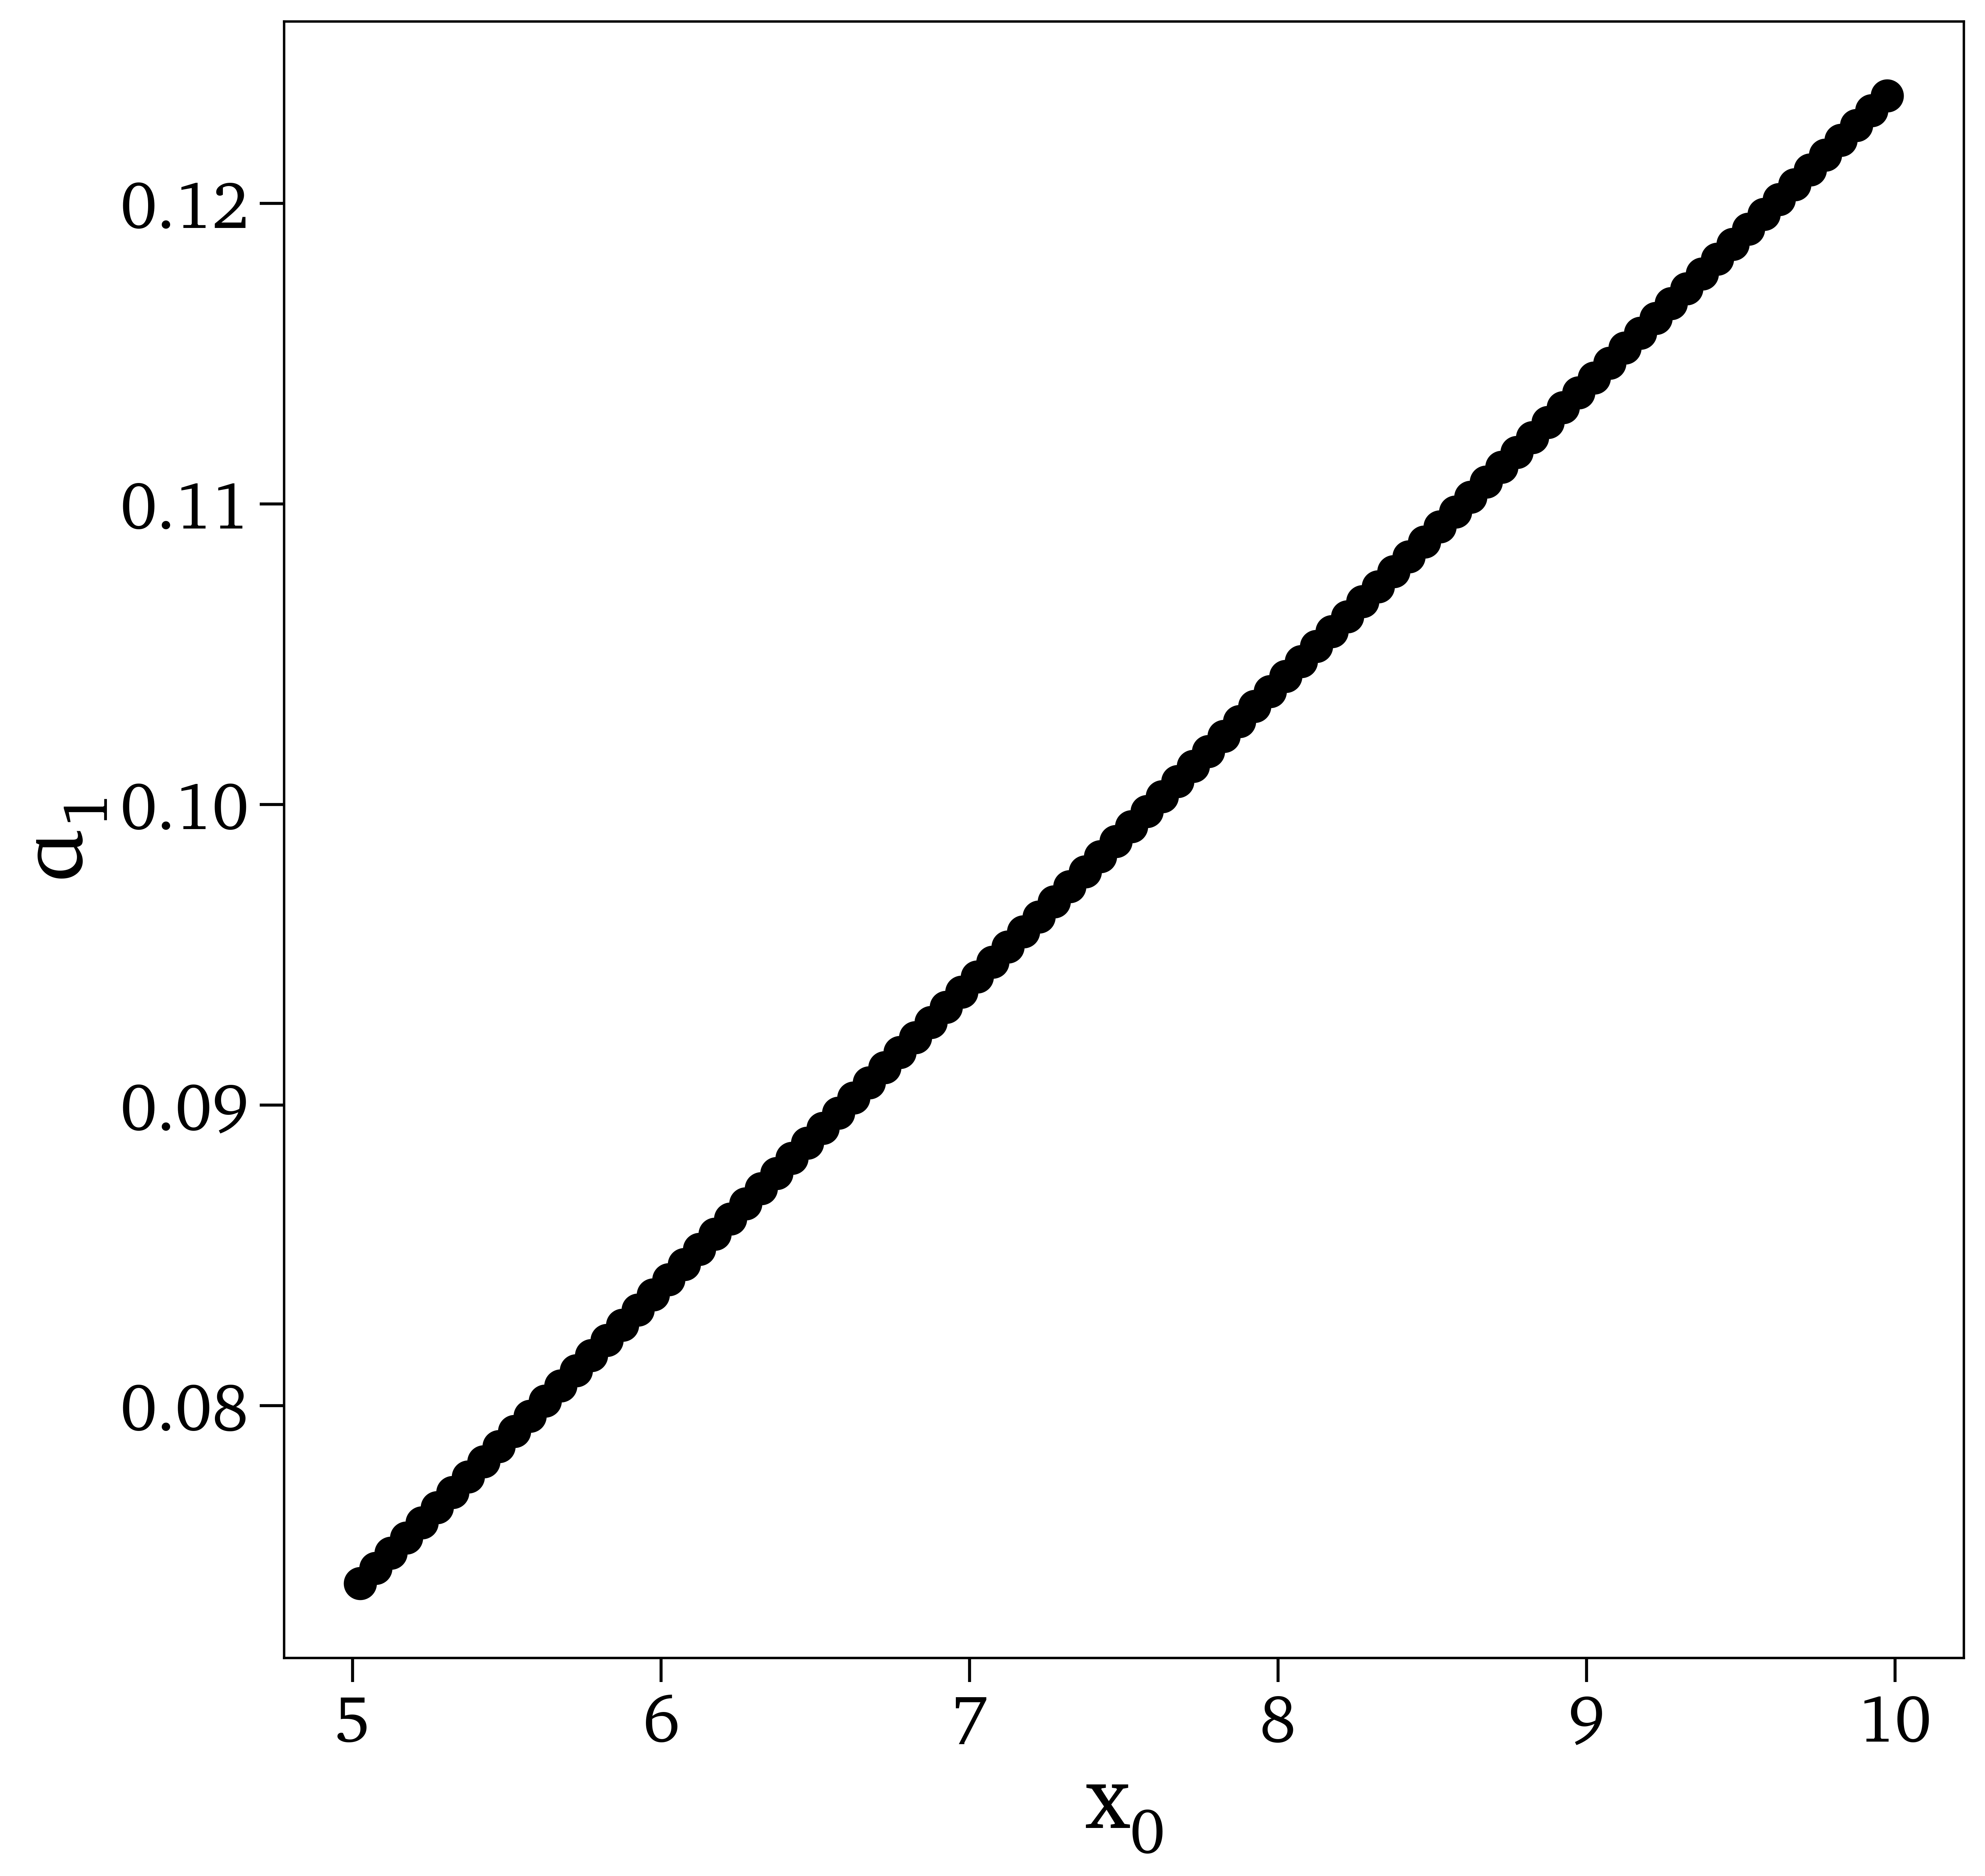

In [15]:
# %matplotlib qt

iVar    = 0#n_modesFinal-1

fig = plt.figure(figsize=(10,10))
plt.scatter(ICs[:,0], A[iVar,:], c='k')
plt.xlabel(r'$x_{0}$')
plt.ylabel(r'$\alpha_{'+str(iVar+1)+'}$')

if (FigDir):
    plt.savefig(FigDir+'/Tanh_alpha'+str(iVar+1)+'.eps', format='eps', bbox_inches='tight')
    pass

### Plotting Eigenmodes

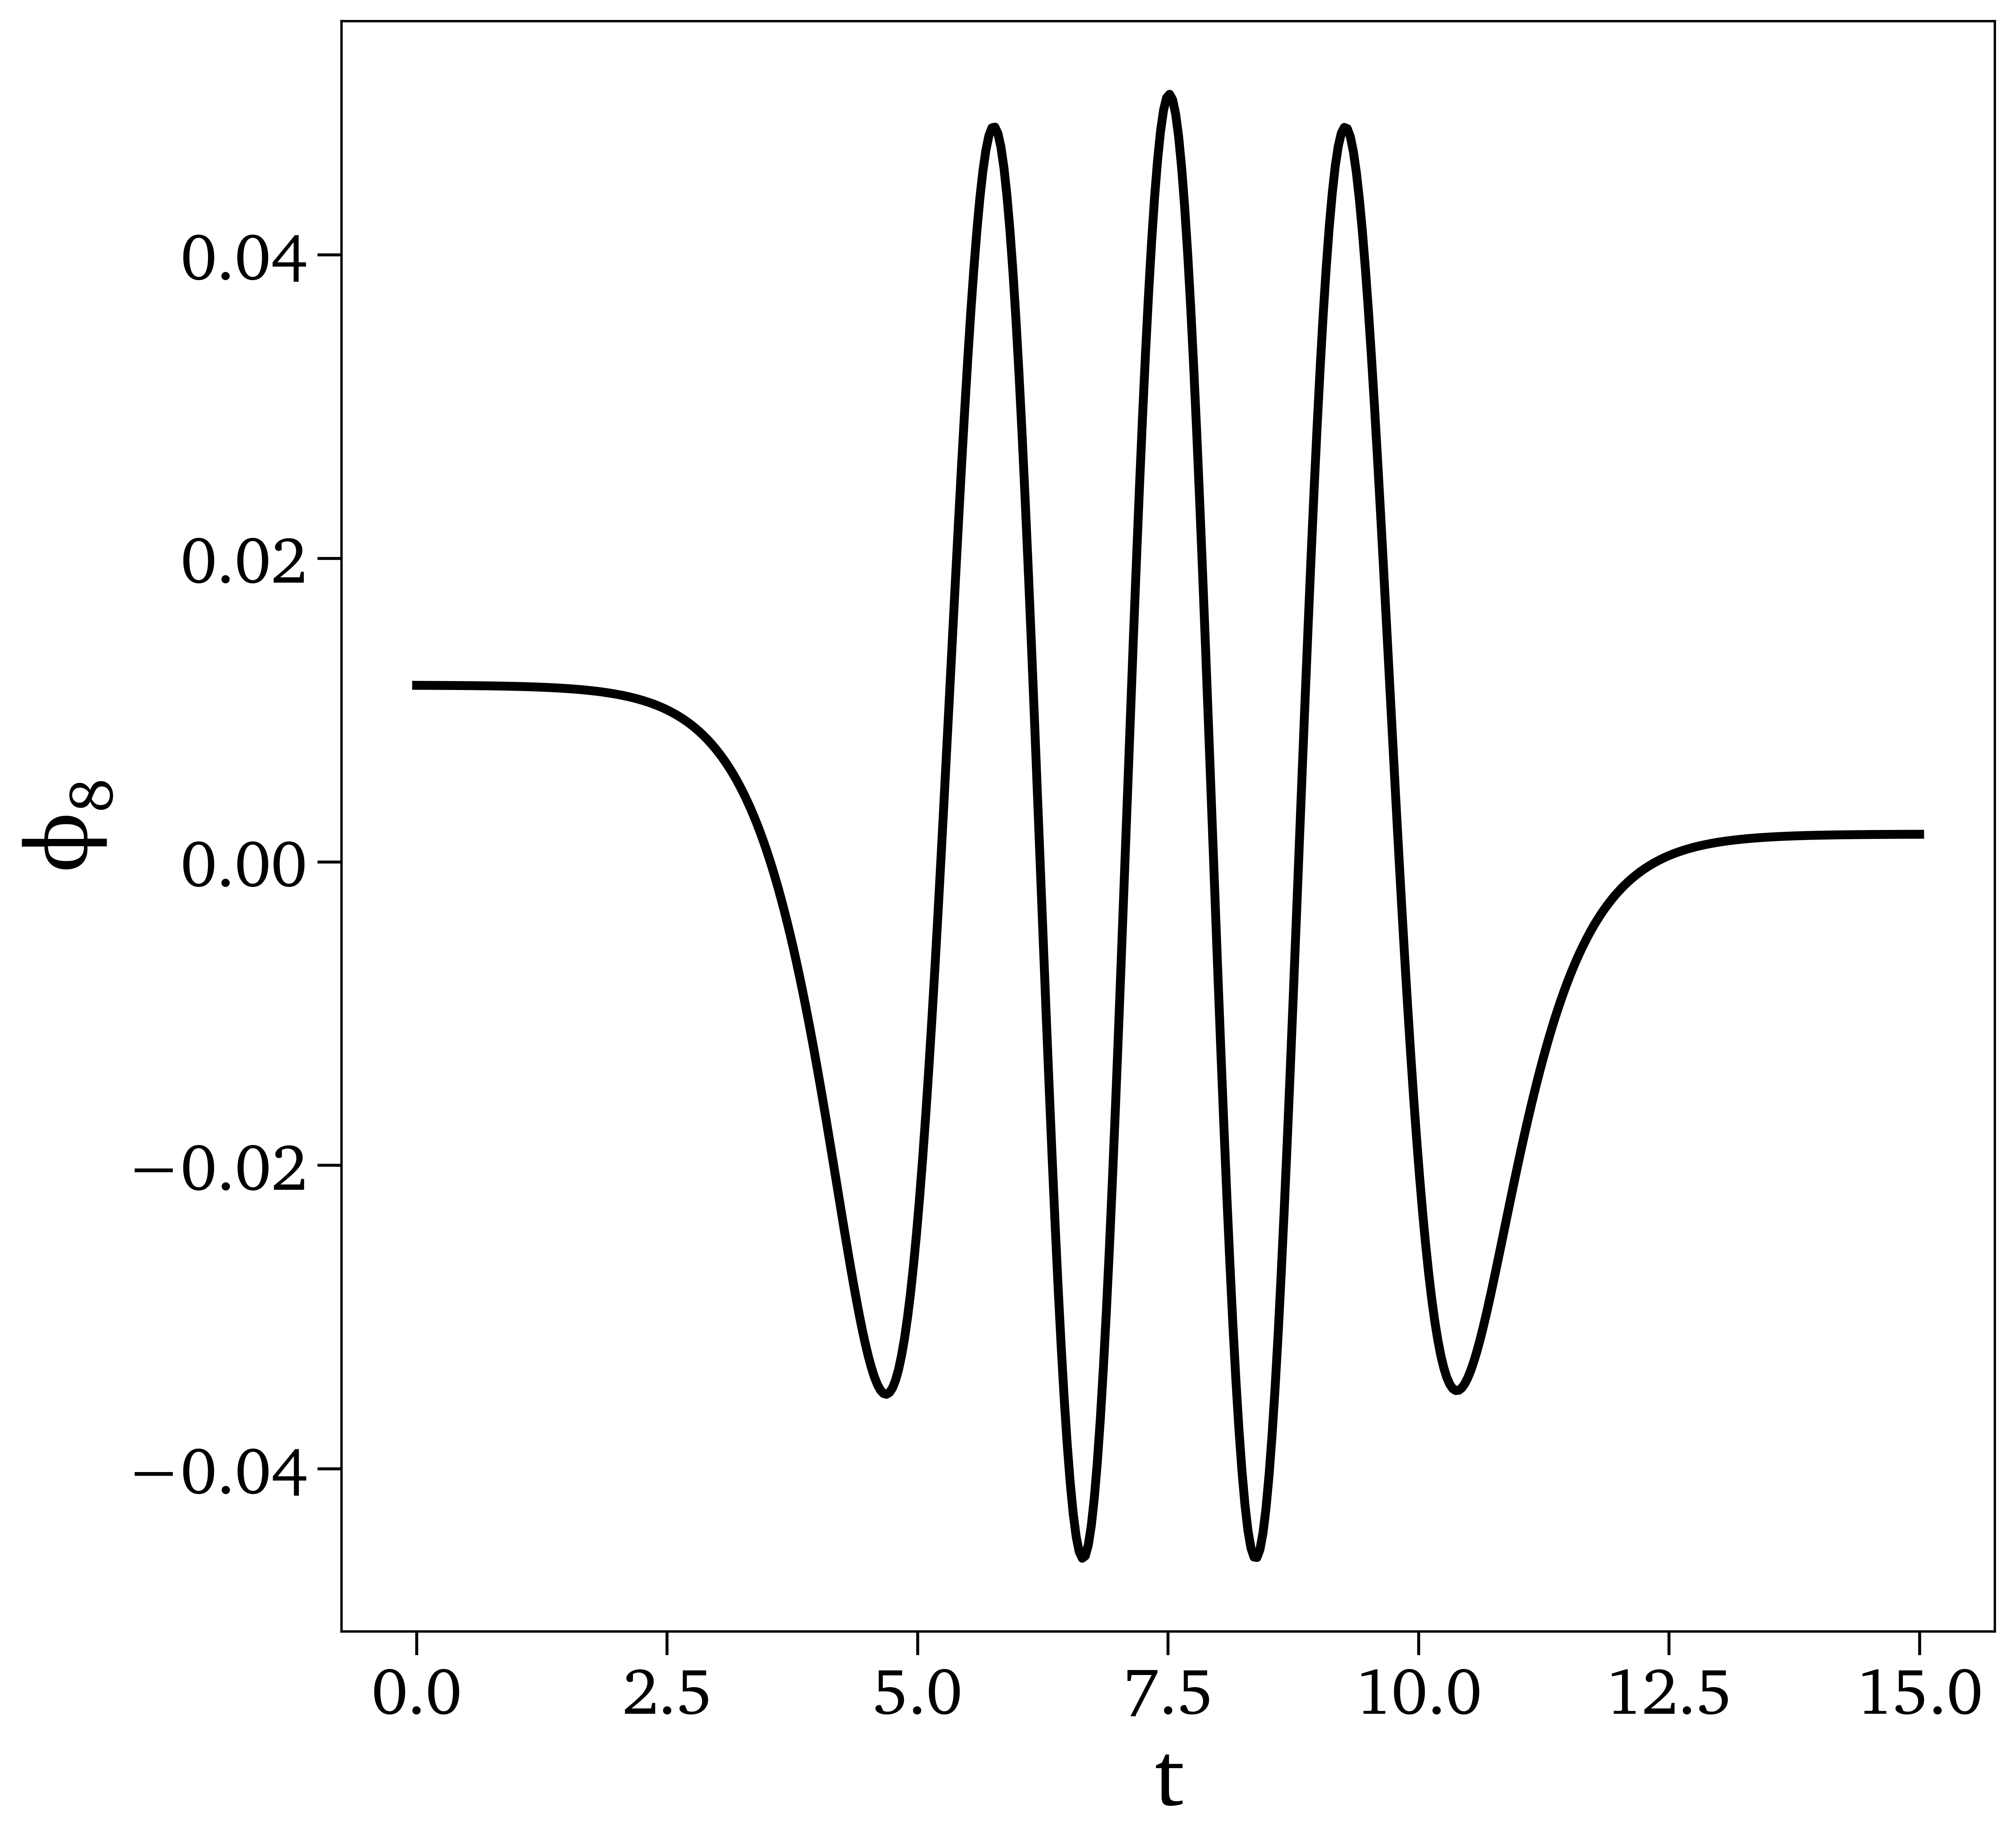

In [16]:
iVar = 7#n_modesFinal-1

plt.figure()
plt.plot(tVec, yMat_pca[:,iVar], '-k')
plt.xlabel(r'$t$')
plt.ylabel(r'$\phi_{'+str(iVar+1)+'}$')

if (FigDir):
    plt.savefig(FigDir+'/TransTanh_phi'+str(iVar+1)+'.eps', format='eps', bbox_inches='tight')

### Comparing Original Data vs Encoded-Decoded Data

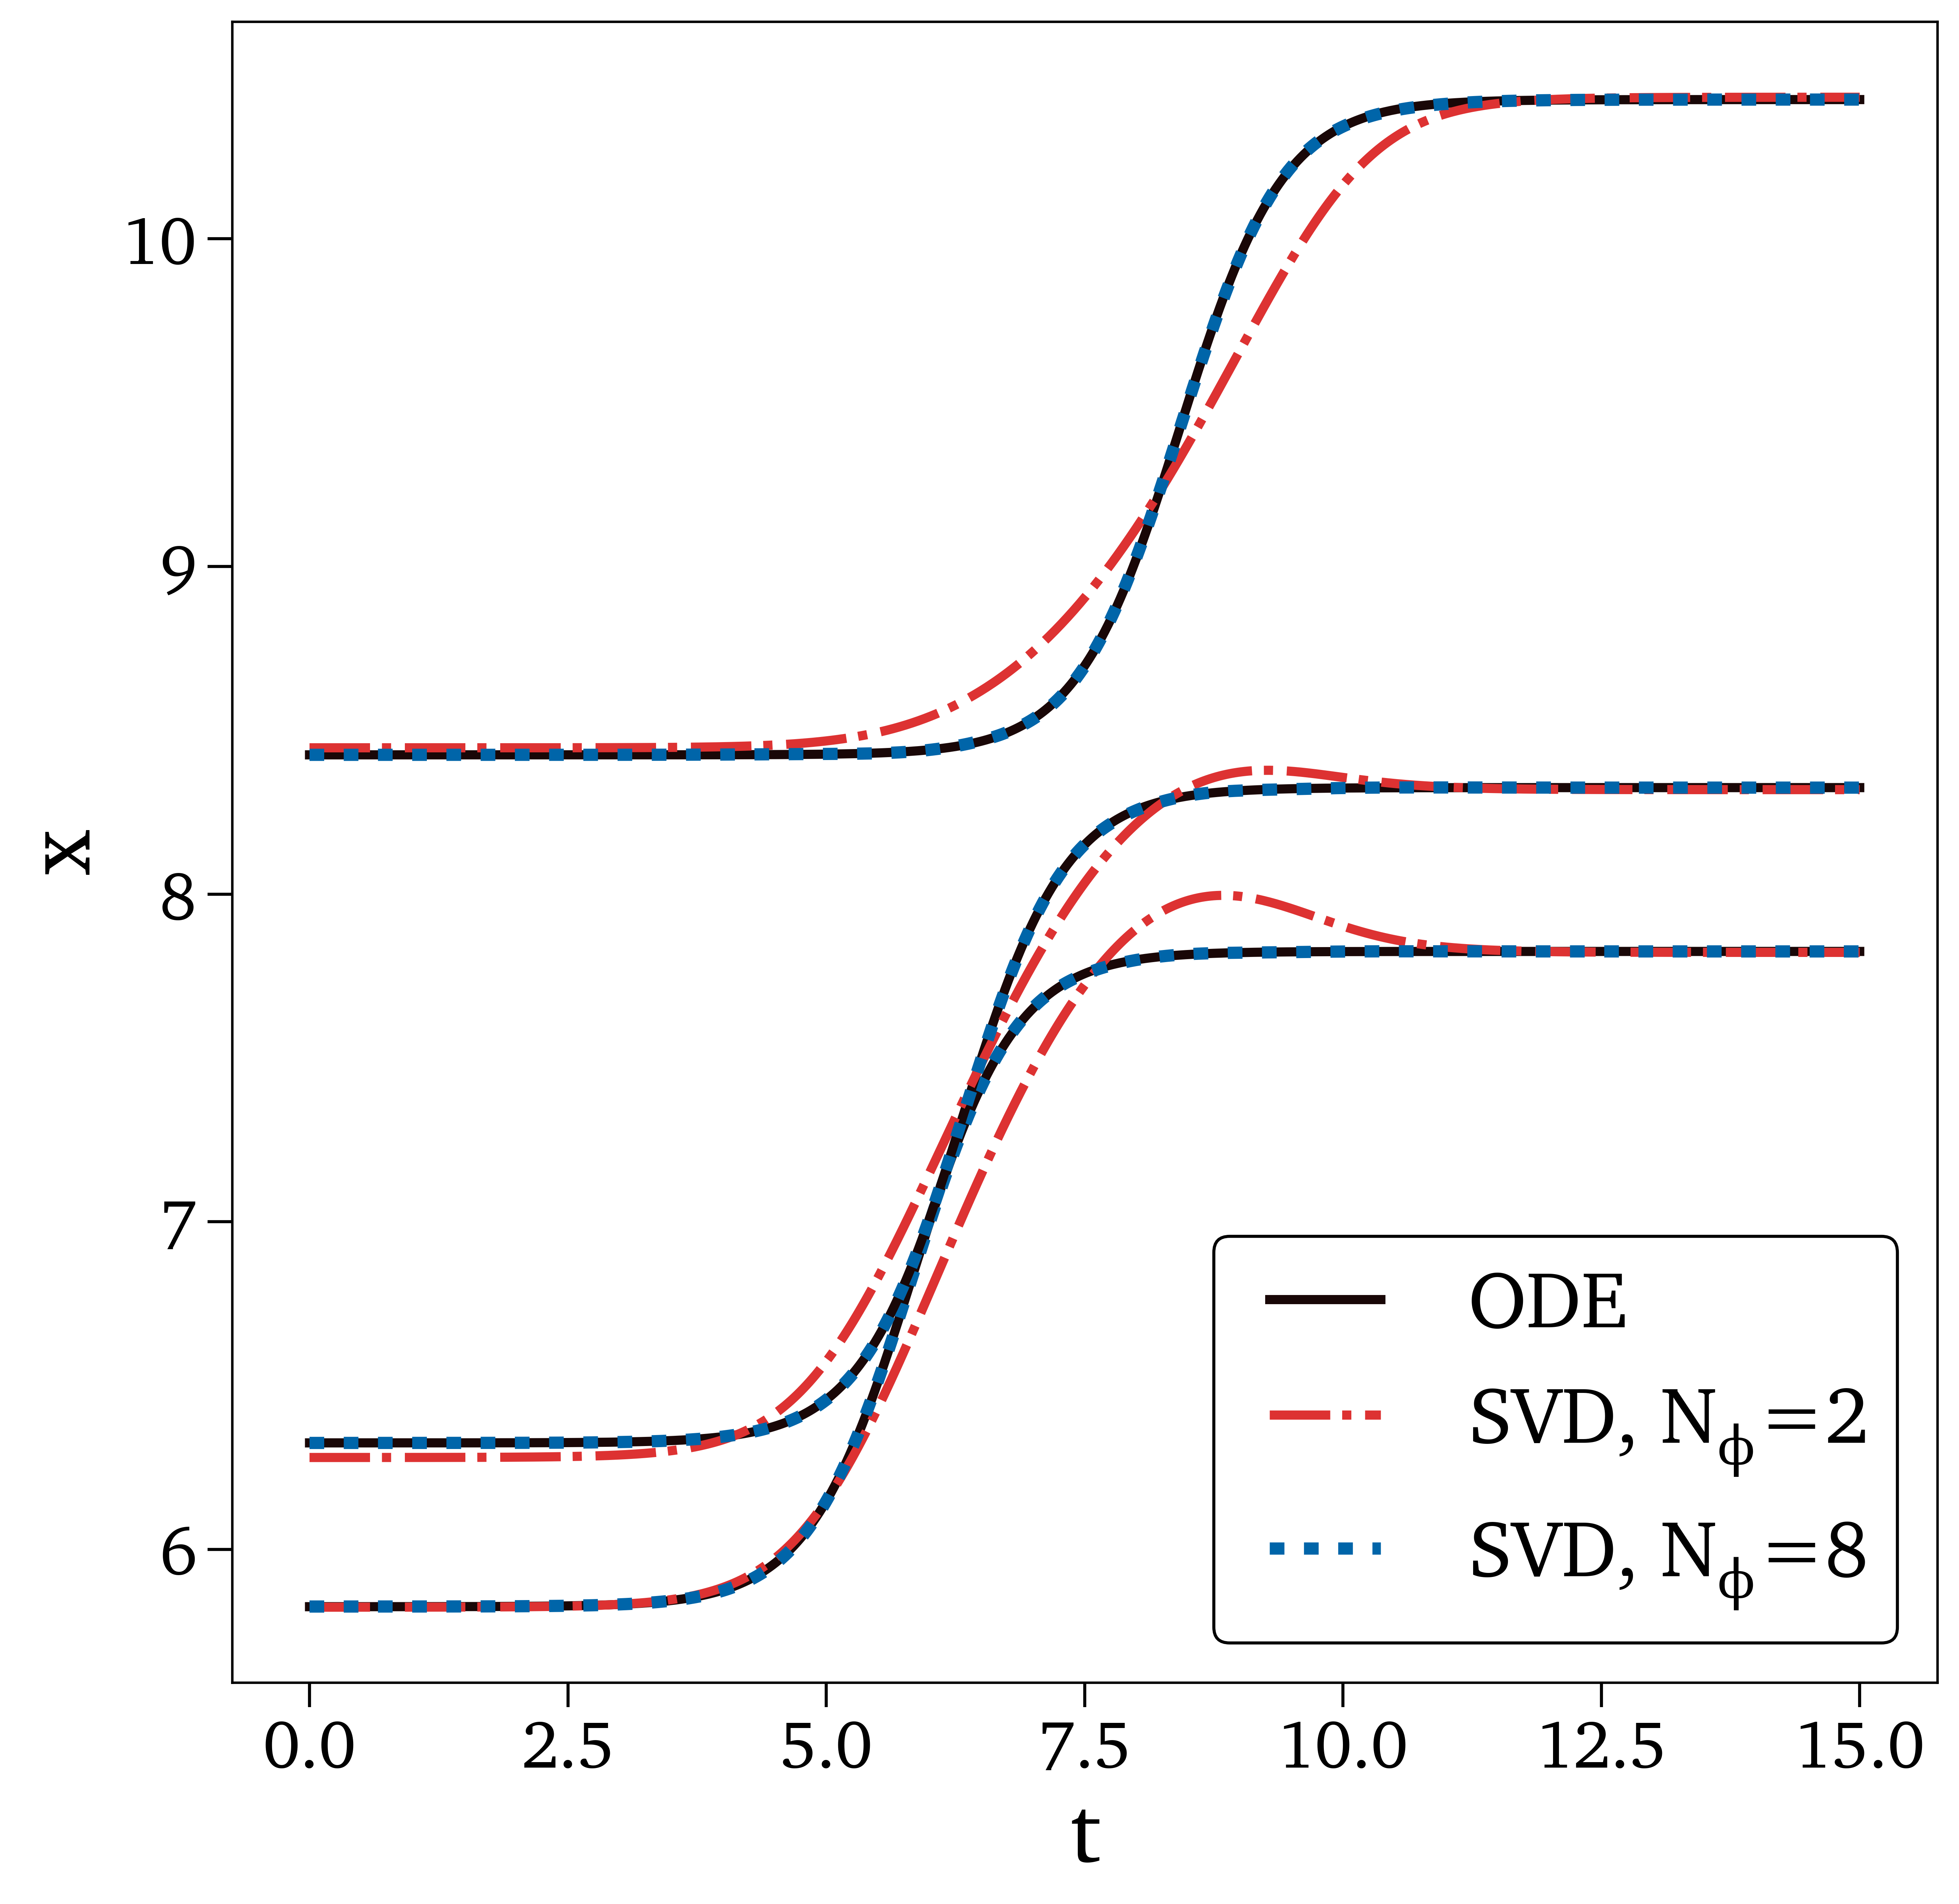

In [17]:
i_scenario_vec = [20,50,70]

plt.figure()

j_scenario = 0
for i_scenario in i_scenario_vec:
    label1 = 'ODE' if (j_scenario==0) else None
    label2 = 'SVD, $N_{\phi}$=2' if (j_scenario==0) else None
    label3 = 'SVD, $N_{\phi}$=8' if (j_scenario==0) else None
    
    plt.plot(tVec, yMat[:,i_scenario],    '-',  c=ColorVec[0],               label=label1)
    plt.plot(tVec, yMat_2_[:,i_scenario], '-.', c=ColorVec[1],               label=label2)
    plt.plot(tVec, yMat_[:,i_scenario],   ':',  c=ColorVec[2],  linewidth=4, label=label3)
    
    j_scenario += 1

plt.legend(loc=4)
plt.xlabel(r'$t$')
plt.ylabel(r'$x$')

if (FigDir):
    plt.savefig(FigDir+'/Tanh_SVD_Reconstructed_.eps', format='eps', bbox_inches='tight')

## Writing Training and Test Data for the Trunks' and Brunches' FNNs

In [18]:
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/ROM/')
except:
    pass

FileName    = OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/ROM/A.csv'
np.savetxt(FileName, A, delimiter=',')

FileName    = OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/ROM/C.csv'
np.savetxt(FileName, C, delimiter=',')

FileName    = OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/ROM/D.csv'
np.savetxt(FileName, D, delimiter=',')

FileName    = OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/ROM/yMat_Scaled.csv'
np.savetxt(FileName, yMat_Scaled, delimiter=',')

In [19]:
VarsPCA          = ['PCA_'+str(i_mode+1) for i_mode in range(n_modesFinal)]
Data             = pd.DataFrame(yMat_pca, columns=VarsPCA)
#tVec[tVec == 0.] = FixedMinVal
Data['t']        = tVec
Data['log(t)']   = np.log(tVec)
Data['log10(t)'] = np.log10(tVec)


Data

/usr/local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0    76.297911 -3.428512  0.238193  0.352264  0.042189  0.061198 -0.008690   
1    76.297916 -3.428505  0.238187  0.352259  0.042185  0.061196 -0.008689   
2    76.297920 -3.428497  0.238180  0.352254  0.042182  0.061193 -0.008688   
3    76.297925 -3.428488  0.238172  0.352248  0.042178  0.061191 -0.008686   
4    76.297931 -3.428479  0.238164  0.352242  0.042175  0.061189 -0.008685   
..         ...       ...       ...       ...       ...       ...       ...   
495  96.088221 -0.567994 -0.008751  0.056912  0.000217  0.009710 -0.000255   
496  96.088229 -0.568002 -0.008758  0.056917  0.000214  0.009712 -0.000253   
497  96.088237 -0.568010 -0.008765  0.056922  0.000211  0.009714 -0.000252   
498  96.088244 -0.568017 -0.008771  0.056927  0.000208  0.009716 -0.000251   
499  96.088251 -0.568024 -0.008776  0.056931  0.000205  0.009718 -0.000250   

        PCA_8         t    log(t)  log10(t)  
0    0.011635   0.00000      -inf      -inf  
1    0.011634   0.03006 -3.504556 -1.522009  
2    0.011634   0.06012 -2.811409 -1.220979  
3    0.011633   0.09018 -2.405944 -1.044888  
4    0.011632   0.12024 -2.118262 -0.919949  
..        ...       ...       ...       ...  
495  0.001819  14.87976  2.700002  1.172596  
496  0.001819  14.90982  2.702020  1.173472  
497  0.001820  14.93988  2.704034  1.174347  
498  0.001821  14.96994  2.706044  1.175220  
499  0.001821  15.00000  2.708050  1.176091  

[500 rows x 11 columns]

### Trunks

In [20]:
from sklearn.model_selection import train_test_split

try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name)
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/train/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/valid/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/test/')
except:
    pass

In [21]:
data_id    = 'pts'

DataNoZero           = Data#[Data['t'] >= FixedMinVal]
n_points             = len(DataNoZero)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=valid_perc/100, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)


try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/valid/'+data_id+'/')
except:
    pass

DataInput  = DataNoZero[['t', 'log10(t)', 'log(t)'] + VarsPCA]
DataInput.iloc[train_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/valid/'+data_id+'/Input.csv', index=False)

DataOutput = DataNoZero[['t', 'log10(t)', 'log(t)'] + VarsPCA]
DataOutput.iloc[train_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/valid/'+data_id+'/Output.csv', index=False)

In [22]:
DataNoZero           = Data
n_points             = len(DataNoZero)

n_test               = n_points


try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/test/ext/')
except:
    pass

DataInput  = DataNoZero[['t', 'log10(t)', 'log(t)'] + VarsPCA]
DataInput.to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/test/ext/Input.csv', index=False)

DataOutput = DataNoZero[['t', 'log10(t)', 'log(t)'] + VarsPCA]
DataOutput.to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Trunk/test/ext/Output.csv', index=False)

### Branches

In [23]:
from sklearn.model_selection import train_test_split

try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name)
except:
    pass

In [24]:
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/train/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/valid/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/test/')
except:
    pass

In [25]:
data_id    = 'pts'

n_points             = len(DataIC)

idx                  = np.arange(n_points)
train_idx, valid_idx = train_test_split(idx, test_size=valid_perc/100, random_state=42)

n_valid              = len(valid_idx)
n_train              = len(train_idx)

try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/train/'+data_id+'/')
except:
    pass
try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/valid/'+data_id+'/')
except:
    pass

DataInput  = DataIC
DataInput.iloc[train_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/train/'+data_id+'/Input.csv', index=False)
DataInput.iloc[valid_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/valid/'+data_id+'/Input.csv', index=False)

DataOutput = pd.DataFrame(np.concatenate([A.T, C[...,np.newaxis], D[...,np.newaxis]], axis=1), columns=['PCA_'+str(i+1) for i in range(A.shape[0])]+['C','D'])
DataOutput.iloc[train_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/train/'+data_id+'/Output.csv', index=False)
DataOutput.iloc[valid_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/valid/'+data_id+'/Output.csv', index=False)

In [26]:
n_points             = len(DataIC)

n_test               = n_points

try:
    os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/test/ext/')
except:
    pass

DataInput  = DataIC
DataInput.to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/test/ext/Input.csv', index=False)

DataOutput = pd.DataFrame(np.concatenate([A.T, C[...,np.newaxis], D[...,np.newaxis]], axis=1), columns=['PCA_'+str(i+1) for i in range(A.shape[0])]+['C','D'])
DataOutput.to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch/test/ext/Output.csv', index=False)

In [27]:
### EXPERIMENTING

# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/')
# except:
#     pass
# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/train/')
# except:
#     pass
# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/valid/')
# except:
#     pass
# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/test/')
# except:
#     pass

In [28]:
# data_id    = 'pts'

# n_points             = len(DataIC)


# # idx                  = np.arange(n_points)
# # train_idx, valid_idx = train_test_split(idx, test_size=valid_perc/100, random_state=42)
# idx                  = np.arange(n_points)
# train_idx            = idx
# valid_idx            = idx

# n_valid              = len(valid_idx)
# n_train              = len(train_idx)

# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/train/'+data_id+'/')
# except:
#     pass
# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/valid/'+data_id+'/')
# except:
#     pass

# DataInput  = DataIC
# DataInput.iloc[train_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/train/'+data_id+'/Input.csv', index=False)
# DataInput.iloc[valid_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/valid/'+data_id+'/Input.csv', index=False)

# YY = np.zeros((A.shape[1],A.shape[1]), dtype=int)
# for i in range(YY.shape[0]):
#     YY[i,i] = 1
# DataYY = pd.DataFrame(YY, columns=['IC_'+str(i+1) for i in range(YY.shape[0])])
# DataYY.iloc[train_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/train/'+data_id+'/Output.csv', index=False)
# DataYY.iloc[valid_idx].to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/valid/'+data_id+'/Output.csv', index=False)

In [29]:
# n_points             = len(DataIC)

# n_test               = n_points

# try:
#     os.makedirs(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/test/ext/')
# except:
#     pass

# DataInput  = DataIC
# DataInput.to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/test/ext/Input.csv', index=False)

# YY = np.zeros((A.shape[1],A.shape[1]), dtype=int)
# for i in range(YY.shape[0]):
#     YY[i,i] = 1
# DataYY = pd.DataFrame(YY, columns=['IC_'+str(i+1) for i in range(YY.shape[0])])
# DataYY.to_csv(OutputDir+'/'+str(PCAType)+'/PCA_'+mode_name+'/Branch_ICs/test/ext/Output.csv', index=False)